<a href="https://colab.research.google.com/github/ThierrryScotto/trabalho_pratico/blob/main/preprocessamento_heat_and_heart_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
!pip install metpy --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from metpy.calc import heat_index
from metpy.units import units

# Helpers

### Constantes

In [3]:
features_datasus = ["hospitalizations", "average_stay", "deaths", "mortality_rate"]

### Funções

# Dataset

In [4]:
url = "https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/INMET.csv"

In [5]:
dataset = pd.read_csv(url, sep=";")
dataset

<ipython-input-5-ad7fa1b16750>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, sep=";")


,DATA,HORA,PRECIPITACAO_TOTAL_HORARIO_MM,PRESSAO_ATMOSFERICA_NIVEL_ESTACAO_HORARIA_MB,PRESSAO_ATMOSFERICA_MAX.NA_HORA_ANT_AUT_MB,PRESSAO_ATMOSFERICA_MIN_NA_HORA_ANT_AUT_MB,RADIACAO_GLOBAL_KJ_m2,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,TEMPERATURA_PONTO_DE_ORVALHO_C,TEMPERATURA_MAXIMA_NA_HORA_ANT_AUT_C,TEMPERATURA_MINIMA_NA_HORA_ANT_AUT_C,TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT_AUT_C,TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT_AUT_C,UMIDADE_REL_MAX_NA_HORA_ANT_AUT_%,UMIDADE_REL_MIN_NA_HORA_ANT_AUT_%,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_DIRECAO_HORARIA_GR,VENTO_RAJADA_MAXIMA_M/S,VENTO_VELOCIDADE_HORARIA_M/S,Unnamed: 19
0,2000-09-22,22:00,0,"1014,1","1014,3",1014,13,"15,7","9,8","17,7","15,6","10,9","9,8",70.0,62.0,68.0,106.0,"6,3","2,4",NaN
1,2000-09-22,21:00,0,"1014,3","1014,3",1014,448,"17,8","10,7","19,8","17,8","10,7","9,4",63.0,51.0,63.0,112.0,"4,7","2,2",NaN
2,2000-09-22,20:00,0,1014,1014,"1013,9",1252,"19,8","9,8","21,2","19,7","10,3","6,5",54.0,40.0,52.0,141.0,"4,3","1,7",NaN
3,2000-09-22,19:00,0,1014,"1014,2","1013,9",1924,"20,9","7,4","21,2","20,3","8,3","6,4",45.0,39.0,42.0,295.0,"3,9","1,7",NaN
4,2000-09-22,18:00,0,"1014,1","1014,8","1014,1",2791,"20,9","6,9","21,3","20,2","9,6","6,2",48.0,40.0,40.0,246.0,"5,2","1,1",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211339,2024-10-31,0200 UTC,0,"1009,8",1010,"1009,8",NaN,"20,8","17,9","21,2","20,8","18,2","17,9",84.0,83.0,84.0,117.0,"7,7",2,NaN
211340,2024-10-31,0100 UTC,0,"1009,9",1010,"1009,8",NaN,"21,1","18,2","21,4","21,1","18,4","18,2",84.0,83.0,83.0,114.0,"11,1","2,4",NaN
211341,2024-10-31,2300 UTC,0,"1006,1","1006,2","1005,5",NaN,"22,6","17,5","23,4","22,6","17,9","17,5",74.0,72.0,73.0,125.0,6,2,NaN
211342,2024-10-31,1000 UTC,0,"1009,7","1009,7","1009,1","464,1","21,8","17,7","21,8","19,7",18,"17,3",87.0,78.0,78.0,130.0,"5,3","1,3",NaN


# Pré-processamento INMET

In [6]:
features = ['DATA',
            'HORA',
            'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C',
            'RADIACAO_GLOBAL_KJ_m2',
            'UMIDADE_RELATIVA_DO_AR_HORARIA_%',
            'VENTO_VELOCIDADE_HORARIA_M/S']

dataset = dataset[features]

In [7]:
dataset[features]

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,22:00,"15,7",13,68.0,"2,4"
1,2000-09-22,21:00,"17,8",448,63.0,"2,2"
2,2000-09-22,20:00,"19,8",1252,52.0,"1,7"
3,2000-09-22,19:00,"20,9",1924,42.0,"1,7"
4,2000-09-22,18:00,"20,9",2791,40.0,"1,1"
...,...,...,...,...,...,...
211339,2024-10-31,0200 UTC,"20,8",NaN,84.0,2
211340,2024-10-31,0100 UTC,"21,1",NaN,83.0,"2,4"
211341,2024-10-31,2300 UTC,"22,6",NaN,73.0,2
211342,2024-10-31,1000 UTC,"21,8","464,1",78.0,"1,3"


In [8]:
dataset.describe()

,UMIDADE_RELATIVA_DO_AR_HORARIA_%
count,211096.000000
mean,-232.412471
std,1735.624458
min,-9999.000000
25%,63.000000
50%,79.000000
75%,89.000000
max,100.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211344 entries, 0 to 211343
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   DATA                                    211344 non-null  object 
 1   HORA                                    211344 non-null  object 
 2   TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C  211101 non-null  object 
 3   RADIACAO_GLOBAL_KJ_m2                   187430 non-null  object 
 4   UMIDADE_RELATIVA_DO_AR_HORARIA_%        211096 non-null  float64
 5   VENTO_VELOCIDADE_HORARIA_M/S            211050 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.7+ MB


In [10]:
dataset.isna().sum()

,0
DATA,0
HORA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,243
RADIACAO_GLOBAL_KJ_m2,23914
UMIDADE_RELATIVA_DO_AR_HORARIA_%,248
VENTO_VELOCIDADE_HORARIA_M/S,294


<h3>Problemas a serem resolvidos</h3>

- Pontos vazios
- dados valores inválidos -9999
- Dados númericos como str

## Tratamentos

In [11]:
dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].str.replace(',', '.').astype(float)
dataset['RADIACAO_GLOBAL_KJ_m2']                  = dataset['RADIACAO_GLOBAL_KJ_m2'].str.replace(',', '.').astype(float)
dataset['VENTO_VELOCIDADE_HORARIA_M/S']           = dataset['VENTO_VELOCIDADE_HORARIA_M/S'].str.replace(',', '.').astype(float)

<ipython-input-11-d8c30489b29d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].str.replace(',', '.').astype(float)
<ipython-input-11-d8c30489b29d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RADIACAO_GLOBAL_KJ_m2']                  = dataset['RADIACAO_GLOBAL_KJ_m2'].str.replace(',', '.').astype(float)
<ipython-input-11-d8c30489b29d>:3: SettingWithCopyWarning: 
A value is trying to be set on 

### Removendo dados inválidos

In [12]:
dataset = dataset.replace(-9999.0, np.nan)

### Removendo outliers dados negativos

In [13]:
# df['Velocidade do Vento (m/s)'] = df['Velocidade do Vento (m/s)'].apply(lambda x: np.nan if x < 0 else x)

In [14]:
dataset[dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] < 0]

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S


In [15]:
dataset[dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'] < 0]

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S


In [16]:
dataset[dataset['VENTO_VELOCIDADE_HORARIA_M/S'] < 0]

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S


In [17]:
dataset.describe()

,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,RADIACAO_GLOBAL_KJ_m2,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
count,204641.000000,94528.000000,204634.000000,203614.000000
mean,19.965591,1210.119407,76.000054,1.537382
std,5.704715,1073.503815,15.736912,1.016877
min,0.400000,0.000000,15.000000,0.000000
25%,16.100000,225.000000,65.000000,0.800000
50%,20.100000,961.000000,79.000000,1.400000
75%,23.700000,2026.025000,89.000000,2.100000
max,40.200000,3999.900000,100.000000,13.300000


In [18]:
dataset.isna().sum()

,0
DATA,0
HORA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,6703
RADIACAO_GLOBAL_KJ_m2,116816
UMIDADE_RELATIVA_DO_AR_HORARIA_%,6710
VENTO_VELOCIDADE_HORARIA_M/S,7730


### Verificando as datas

In [19]:
dataset['DATA'] = pd.to_datetime(dataset['DATA'])

In [20]:
dataset['DATA']

,DATA
0,2000-09-22
1,2000-09-22
2,2000-09-22
3,2000-09-22
4,2000-09-22
...,...
211339,2024-10-31
211340,2024-10-31
211341,2024-10-31
211342,2024-10-31


Verificando se a sequencia das datas estão corretas

In [21]:
start_date = dataset['DATA'].min()
end_date = dataset['DATA'].max()
complete_dates = pd.date_range(start=start_date, end=end_date)

datas_faltantes = complete_dates.difference(dataset['DATA'])

print("Datas faltantes:")
print(datas_faltantes)

Datas faltantes:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### Plot

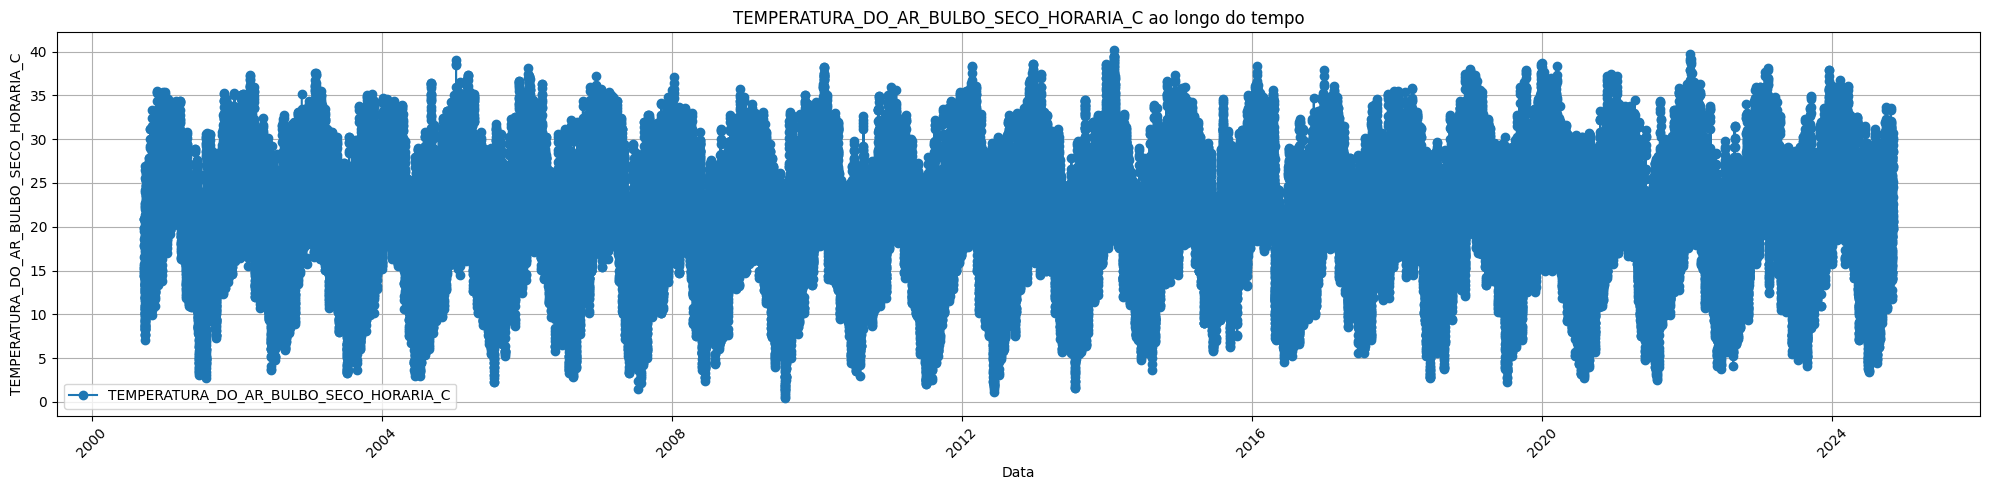

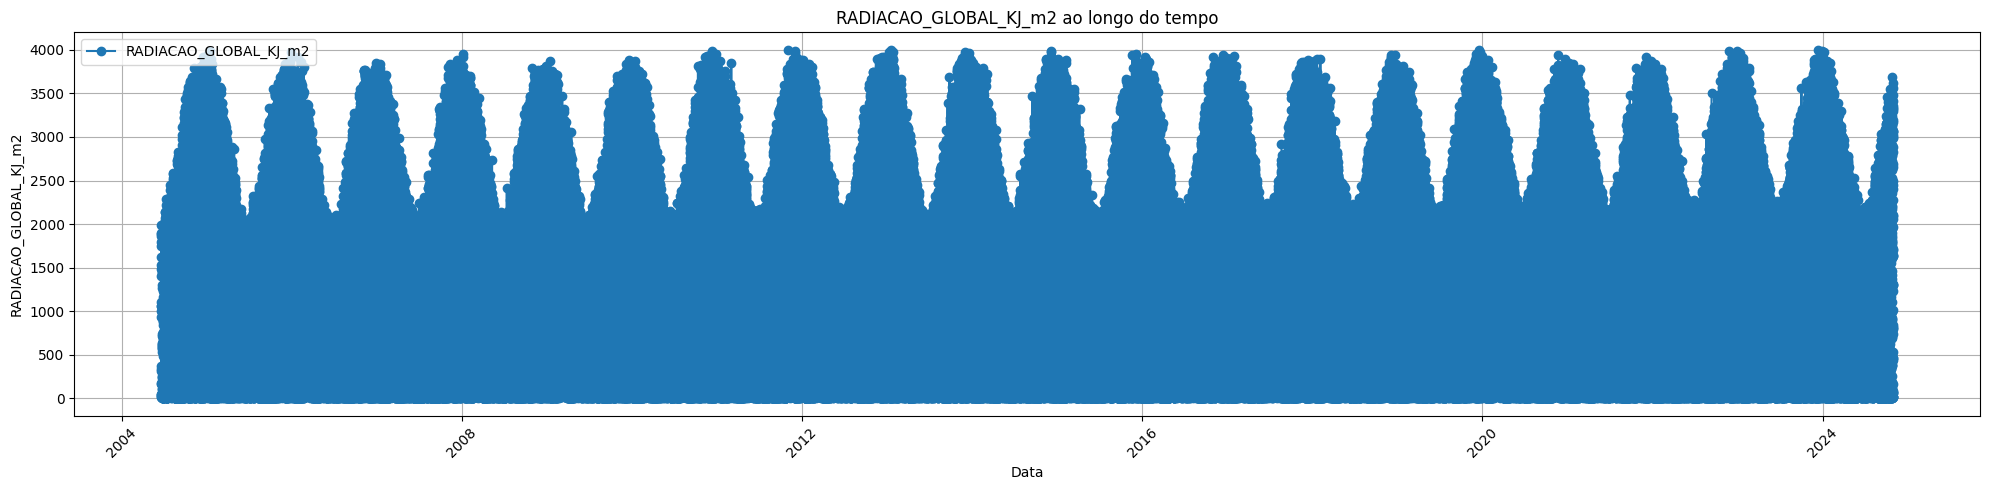

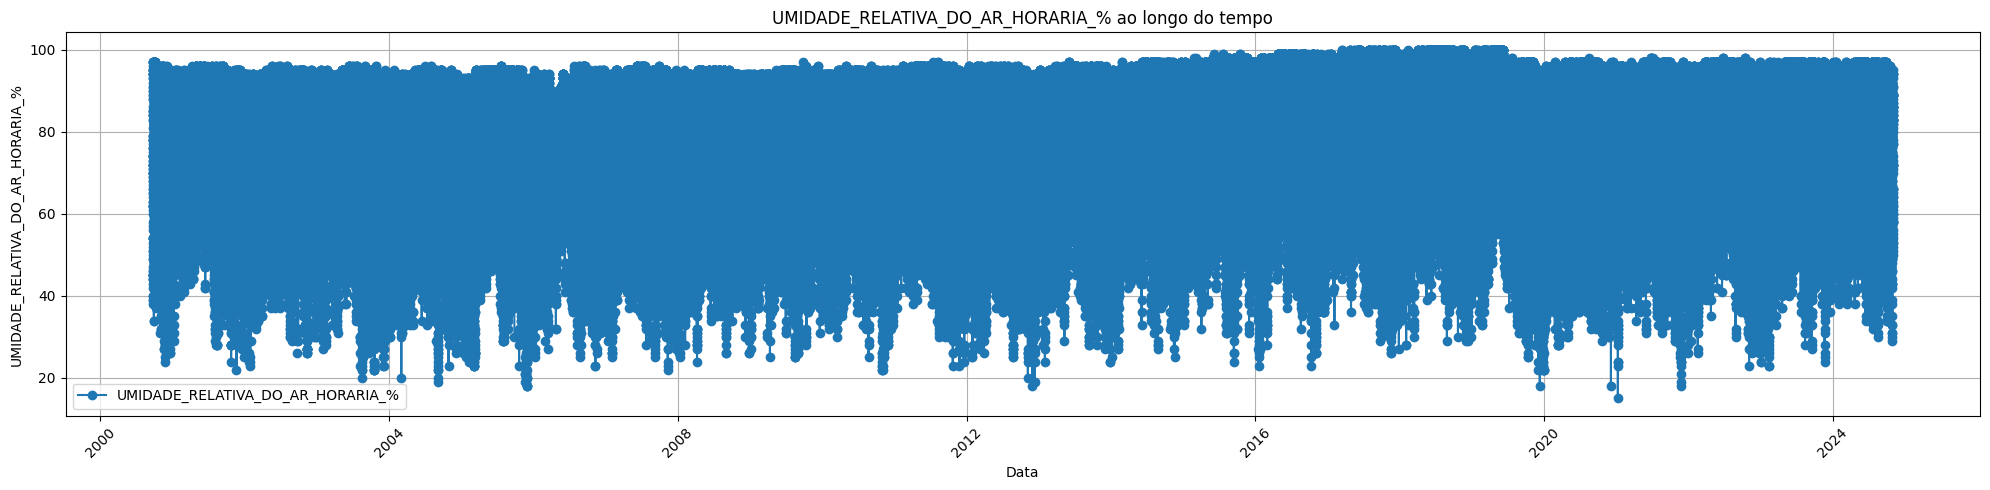

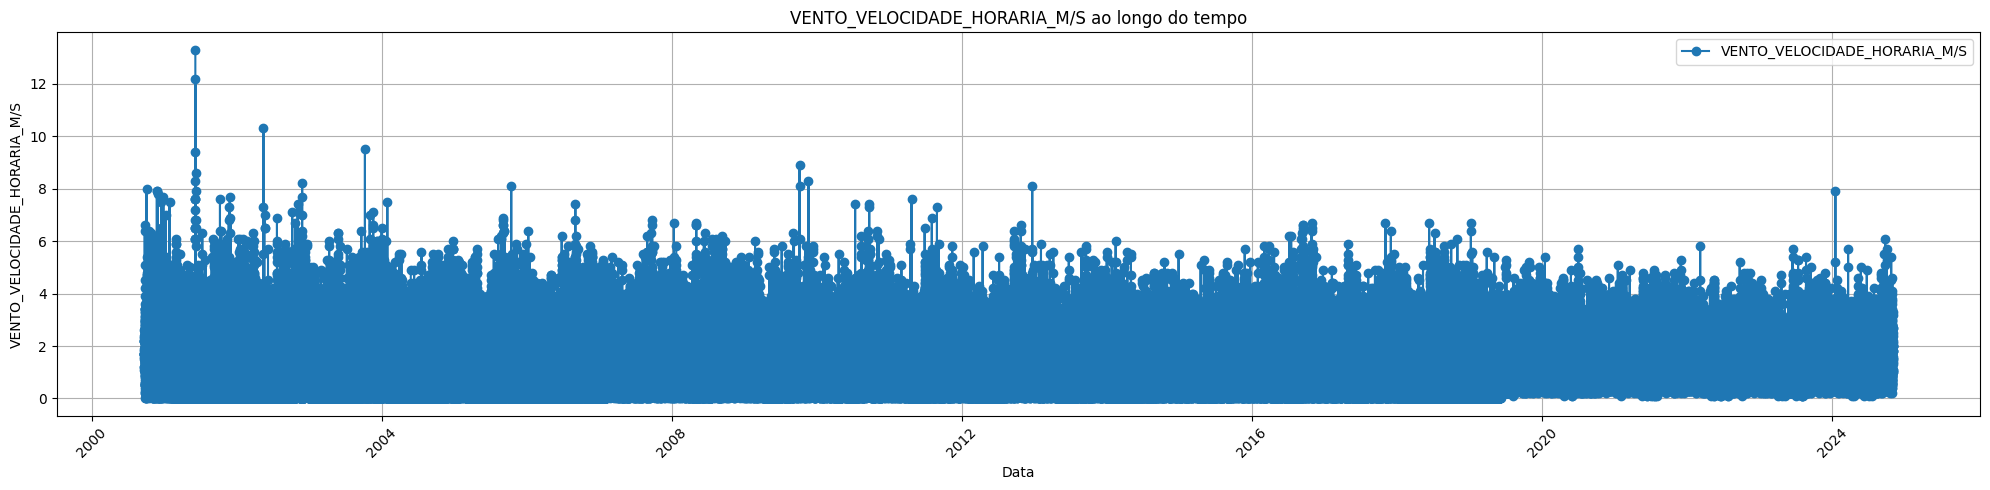

In [22]:
columns = ['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C',
            'RADIACAO_GLOBAL_KJ_m2',
            'UMIDADE_RELATIVA_DO_AR_HORARIA_%',
            'VENTO_VELOCIDADE_HORARIA_M/S']

for variavel in columns:
    plt.figure(figsize=(20, 5))
    plt.plot(dataset['DATA'], dataset[variavel], marker='o', label=variavel)
    plt.title(f'{variavel} ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel(variavel)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Missing data

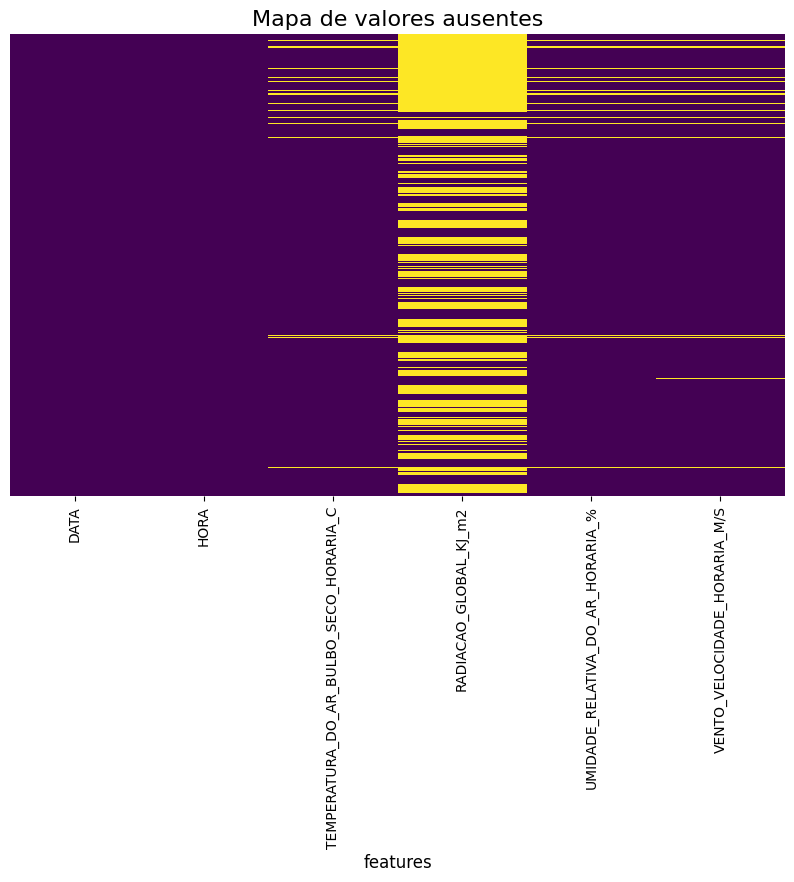

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de valores ausentes', fontsize=16)
plt.xlabel('features', fontsize=12)
plt.show()

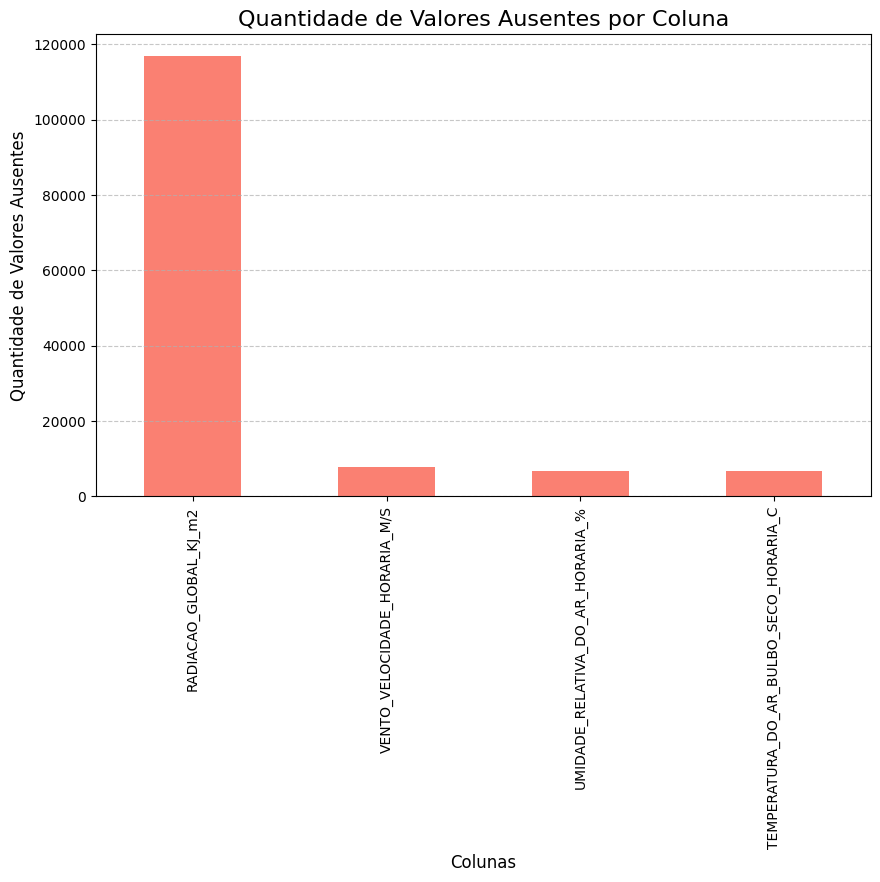

In [24]:
missing_data = dataset.isnull().sum()

plt.figure(figsize=(10, 6))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Quantidade de Valores Ausentes por Coluna', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Quantidade de Valores Ausentes', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
len(dataset['RADIACAO_GLOBAL_KJ_m2'])

211344

In [26]:
radiacao = (dataset['RADIACAO_GLOBAL_KJ_m2'].count() / dataset['RADIACAO_GLOBAL_KJ_m2'].isna().sum()) * 100
temp     = (dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].isna().sum() / dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].count()) * 100
umidade  = (dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].isna().sum() / dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].count()) * 100
vento    = (dataset['VENTO_VELOCIDADE_HORARIA_M/S'].isna().sum() / dataset['VENTO_VELOCIDADE_HORARIA_M/S'].count()) * 100

print(f'Radiacao: {radiacao:.2f}%')
print(f'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C: {temp:.2f}%')
print(f'UMIDADE_RELATIVA_DO_AR_HORARIA_%: {umidade:.2f}%')
print(f'VENTO_VELOCIDADE_HORARIA_M/S: {vento:.2f}%')

Radiacao: 80.92%
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C: 3.28%
UMIDADE_RELATIVA_DO_AR_HORARIA_%: 3.28%
VENTO_VELOCIDADE_HORARIA_M/S: 3.80%


In [27]:
dataset['DATA']

,DATA
0,2000-09-22
1,2000-09-22
2,2000-09-22
3,2000-09-22
4,2000-09-22
...,...
211339,2024-10-31
211340,2024-10-31
211341,2024-10-31
211342,2024-10-31


### Remover radiação solar

In [28]:
dataset.drop('RADIACAO_GLOBAL_KJ_m2', axis=1, inplace=True)

### Aplicando interpolação nearest (mais próximo)

**Algumas horas estão com valores NAN**

In [29]:
none_values = dataset[dataset.isnull().any(axis=1)]
none_values

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
14,2000-09-22,00:00,NaN,NaN,NaN
15,2000-09-22,01:00,NaN,NaN,NaN
16,2000-09-22,02:00,NaN,NaN,NaN
17,2000-09-22,03:00,NaN,NaN,NaN
480,2000-10-12,23:00,NaN,NaN,NaN
...,...,...,...,...,...
207229,2024-05-13,0000 UTC,19.5,97.0,NaN
207564,2024-05-27,1100 UTC,NaN,NaN,NaN
207573,2024-05-27,0900 UTC,NaN,NaN,NaN
207574,2024-05-27,1000 UTC,NaN,NaN,NaN


In [30]:
none_values.head(10)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
14,2000-09-22,00:00,NaN,NaN,NaN
15,2000-09-22,01:00,NaN,NaN,NaN
16,2000-09-22,02:00,NaN,NaN,NaN
17,2000-09-22,03:00,NaN,NaN,NaN
480,2000-10-12,23:00,NaN,NaN,NaN
481,2000-10-12,22:00,NaN,NaN,NaN
482,2000-10-12,21:00,NaN,NaN,NaN
483,2000-10-12,20:00,NaN,NaN,NaN
484,2000-10-12,19:00,NaN,NaN,NaN
485,2000-10-12,18:00,NaN,NaN,NaN


In [31]:
dataset.head(10)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,22:00,15.7,68.0,2.4
1,2000-09-22,21:00,17.8,63.0,2.2
2,2000-09-22,20:00,19.8,52.0,1.7
3,2000-09-22,19:00,20.9,42.0,1.7
4,2000-09-22,18:00,20.9,40.0,1.1
5,2000-09-22,17:00,20.9,44.0,1.7
6,2000-09-22,16:00,19.8,45.0,1.2
7,2000-09-22,15:00,19.5,45.0,1.7
8,2000-09-22,14:00,18.6,49.0,1.6
9,2000-09-22,13:00,17.9,62.0,2.3


In [32]:
np.mean(dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']), np.mean(dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%']), np.mean(dataset['VENTO_VELOCIDADE_HORARIA_M/S'])

(19.965590961732985, 76.00005375450804, 1.5373824982565047)

In [33]:
dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'] = dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].interpolate(method="nearest")
dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%']       = dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].interpolate(method="nearest")
dataset['VENTO_VELOCIDADE_HORARIA_M/S']           = dataset['VENTO_VELOCIDADE_HORARIA_M/S'].interpolate(method="nearest")

In [34]:
dataset.isna().sum()

,0
DATA,0
HORA,0
TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,0
UMIDADE_RELATIVA_DO_AR_HORARIA_%,0
VENTO_VELOCIDADE_HORARIA_M/S,0


In [35]:
np.mean(dataset['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']), np.mean(dataset['UMIDADE_RELATIVA_DO_AR_HORARIA_%']), np.mean(dataset['VENTO_VELOCIDADE_HORARIA_M/S'])

(19.939770232417292, 75.96847320009084, 1.5430653342418044)

## Agrupando dados em dados diários

In [36]:
dataset.head(23)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,22:00,15.7,68.0,2.4
1,2000-09-22,21:00,17.8,63.0,2.2
2,2000-09-22,20:00,19.8,52.0,1.7
3,2000-09-22,19:00,20.9,42.0,1.7
4,2000-09-22,18:00,20.9,40.0,1.1
5,2000-09-22,17:00,20.9,44.0,1.7
6,2000-09-22,16:00,19.8,45.0,1.2
7,2000-09-22,15:00,19.5,45.0,1.7
8,2000-09-22,14:00,18.6,49.0,1.6
9,2000-09-22,13:00,17.9,62.0,2.3


In [37]:
df_sorted = dataset.sort_values(
    by=["DATA", "TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C", "UMIDADE_RELATIVA_DO_AR_HORARIA_%"],
    ascending=[True, False, False]
)

grouped_df = df_sorted.groupby("DATA").first().reset_index()
grouped_df.head(5)

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,17:00,20.9,44.0,1.7
1,2000-09-23,17:00,26.9,49.0,0.7
2,2000-09-24,02:00,18.7,97.0,0.5
3,2000-09-25,19:00,14.8,39.0,2.4
4,2000-09-26,17:00,17.1,39.0,2.2


In [38]:
grouped_df

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S
0,2000-09-22,17:00,20.9,44.0,1.7
1,2000-09-23,17:00,26.9,49.0,0.7
2,2000-09-24,02:00,18.7,97.0,0.5
3,2000-09-25,19:00,14.8,39.0,2.4
4,2000-09-26,17:00,17.1,39.0,2.2
...,...,...,...,...,...
8801,2024-10-27,1800 UTC,24.9,31.0,1.8
8802,2024-10-28,1700 UTC,28.0,52.0,1.4
8803,2024-10-29,1800 UTC,28.9,58.0,1.6
8804,2024-10-30,1700 UTC,28.0,58.0,3.3


## Feature engineering

In [39]:
from metpy.calc import heat_index
from metpy.units import units

### Convertendo TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C para Fahrenheit

### Criando feature HI (NWS)
https://www.wpc.ncep.noaa.gov/html/heatindex.shtml

In [40]:
# Converter Celsius para Fahrenheit
temperature_fahrenheit = grouped_df['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].values * 9/5 + 32

# aplicando a unidade de medida
temperature_fahrenheit = temperature_fahrenheit * units.degF
relative_humidity = grouped_df['UMIDADE_RELATIVA_DO_AR_HORARIA_%'].values * units.percent

# Calcular o Heat Index (em Fahrenheit)
heat_index_fahrenheit = heat_index(temperature_fahrenheit, relative_humidity)

# Converter o resultado de volta para Celsius
grouped_df['heat_index_f'] = heat_index_fahrenheit.round(2)
grouped_df['heat_index'] = ((grouped_df['heat_index_f'].values - 32) * 5/9).round(2)

print(f"Heat Index (HI) em Celsius: {grouped_df['heat_index']}\n\n")
print(f"Heat Index (HI) em fahrenheit: {grouped_df['heat_index_f']}")

Heat Index (HI) em Celsius: 0       20.19
1       27.27
2       19.16
3       13.36
4       15.88
        ...  
8801    24.26
8802    28.63
8803    30.57
8804    29.23
8805    32.32
Name: heat_index, Length: 8806, dtype: float64


Heat Index (HI) em fahrenheit: 0       68.35
1       81.08
2       66.48
3       56.04
4       60.59
        ...  
8801    75.66
8802    83.54
8803    87.03
8804    84.62
8805    90.17
Name: heat_index_f, Length: 8806, dtype: float64


#### Test

In [41]:
num = 2

In [42]:
grouped_df['UMIDADE_RELATIVA_DO_AR_HORARIA_%'][num]

97.0

In [43]:
grouped_df['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'][num]

18.7

In [44]:
(grouped_df['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].values * 9/5 + 32)[num]

65.66

In [45]:
grouped_df['heat_index_f'][num]

66.48

In [46]:
grouped_df['heat_index'][num]

19.16

In [47]:
grouped_df

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S,heat_index_f,heat_index
0,2000-09-22,17:00,20.9,44.0,1.7,68.35,20.19
1,2000-09-23,17:00,26.9,49.0,0.7,81.08,27.27
2,2000-09-24,02:00,18.7,97.0,0.5,66.48,19.16
3,2000-09-25,19:00,14.8,39.0,2.4,56.04,13.36
4,2000-09-26,17:00,17.1,39.0,2.2,60.59,15.88
...,...,...,...,...,...,...,...
8801,2024-10-27,1800 UTC,24.9,31.0,1.8,75.66,24.26
8802,2024-10-28,1700 UTC,28.0,52.0,1.4,83.54,28.63
8803,2024-10-29,1800 UTC,28.9,58.0,1.6,87.03,30.57
8804,2024-10-30,1700 UTC,28.0,58.0,3.3,84.62,29.23


In [48]:
grouped_df[grouped_df['heat_index'] > 37.2]

,DATA,HORA,TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C,UMIDADE_RELATIVA_DO_AR_HORARIA_%,VENTO_VELOCIDADE_HORARIA_M/S,heat_index_f,heat_index
78,2000-12-09,16:00,34.6,44.0,1.9,99.83,37.68
82,2000-12-13,17:00,33.7,49.0,0.5,99.37,37.43
95,2000-12-26,20:00,35.4,42.0,2.0,101.53,38.63
96,2000-12-27,14:00,34.3,48.0,4.1,101.06,38.37
105,2001-01-05,16:00,35.4,45.0,2.7,103.43,39.68
...,...,...,...,...,...,...,...
8555,2024-02-24,1600 UTC,32.5,58.0,1.7,99.72,37.62
8573,2024-03-13,1700 UTC,33.4,54.0,1.2,101.11,38.39
8574,2024-03-14,1700 UTC,35.6,40.0,1.2,101.04,38.36
8578,2024-03-18,1800 UTC,34.2,53.0,0.9,103.85,39.92


### HI média mensal

In [49]:
grouped_df['DATA'].dt.to_period('M')

,DATA
0,2000-09
1,2000-09
2,2000-09
3,2000-09
4,2000-09
...,...
8801,2024-10
8802,2024-10
8803,2024-10
8804,2024-10


In [50]:
grouped_df['month'] = grouped_df['DATA'].dt.to_period('M')

monthly_df = grouped_df.groupby('month')['heat_index'].mean().reset_index()

monthly_df

,month,heat_index
0,2000-09,21.801111
1,2000-10,23.427742
2,2000-11,26.305667
3,2000-12,30.079677
4,2001-01,31.907742
...,...,...
285,2024-06,22.028667
286,2024-07,17.503548
287,2024-08,20.590000
288,2024-09,24.021000


#### Desvio padrão

In [51]:
standard_deviation = grouped_df.groupby('month')['heat_index'].std().reset_index()
monthly_df['standard_deviation'] = standard_deviation['heat_index']

monthly_df

,month,heat_index,standard_deviation
0,2000-09,21.801111,5.031489
1,2000-10,23.427742,3.864828
2,2000-11,26.305667,4.183658
3,2000-12,30.079677,4.615565
4,2001-01,31.907742,4.864888
...,...,...,...
285,2024-06,22.028667,5.929766
286,2024-07,17.503548,5.561158
287,2024-08,20.590000,5.447565
288,2024-09,24.021000,4.649160


#### Temperatura média, Humidade média e Média da Velocidade do vento

In [52]:
monthly_mean = grouped_df.groupby('month').agg({
    'TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C': 'mean',
    'UMIDADE_RELATIVA_DO_AR_HORARIA_%': 'mean',
    'VENTO_VELOCIDADE_HORARIA_M/S': 'mean'
}).reset_index()

# Arredondando os resultados para 2 casas decimais
monthly_mean = monthly_mean.round(2)

monthly_df['mean_temperature'] = monthly_mean['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']
monthly_df['mean_humidity'] = monthly_mean['UMIDADE_RELATIVA_DO_AR_HORARIA_%']
monthly_df['mean_wind_speed'] = monthly_mean['VENTO_VELOCIDADE_HORARIA_M/S']

monthly_df

,month,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed
0,2000-09,21.801111,5.031489,22.08,51.78,1.47
1,2000-10,23.427742,3.864828,23.24,62.81,2.75
2,2000-11,26.305667,4.183658,26.29,51.73,2.28
3,2000-12,30.079677,4.615565,28.94,51.32,2.00
4,2001-01,31.907742,4.864888,29.69,59.10,2.19
...,...,...,...,...,...,...
285,2024-06,22.028667,5.929766,21.99,64.67,1.66
286,2024-07,17.503548,5.561158,17.91,67.87,1.31
287,2024-08,20.590000,5.447565,20.85,60.29,1.61
288,2024-09,24.021000,4.649160,23.80,63.00,1.42


#### Temperatura Máxima e Mínima

In [53]:
max_temp = grouped_df.groupby('month')['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].max().reset_index()
min_temp = grouped_df.groupby('month')['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C'].min().reset_index()

monthly_df['max_temperature'] = max_temp['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']
monthly_df['min_temperature'] = min_temp['TEMPERATURA_DO_AR_BULBO_SECO_HORARIA_C']

monthly_df

,month,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature
0,2000-09,21.801111,5.031489,22.08,51.78,1.47,26.9,14.8
1,2000-10,23.427742,3.864828,23.24,62.81,2.75,31.2,18.6
2,2000-11,26.305667,4.183658,26.29,51.73,2.28,35.5,20.7
3,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2
4,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4
...,...,...,...,...,...,...,...,...
285,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6
286,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8
287,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5
288,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0


#### Soma HI

In [54]:
sum_heat_index = grouped_df.groupby('month')['heat_index'].sum().reset_index()

monthly_df['sum_heat_index'] = sum_heat_index['heat_index']

monthly_df

,month,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index
0,2000-09,21.801111,5.031489,22.08,51.78,1.47,26.9,14.8,196.21
1,2000-10,23.427742,3.864828,23.24,62.81,2.75,31.2,18.6,726.26
2,2000-11,26.305667,4.183658,26.29,51.73,2.28,35.5,20.7,789.17
3,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47
4,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14
...,...,...,...,...,...,...,...,...,...
285,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6,660.86
286,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8,542.61
287,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5,638.29
288,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0,720.63


#### Percentil 95 e 99

In [55]:
percentil_95 = grouped_df.groupby('month')['heat_index'].apply(lambda x: np.percentile(x, 95)).reset_index()
percentil_99 = grouped_df.groupby('month')['heat_index'].apply(lambda x: np.percentile(x, 99)).reset_index()

monthly_df['percentil_95'] = percentil_95['heat_index']
monthly_df['percentil_99'] = percentil_99['heat_index']

monthly_df

,month,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99
0,2000-09,21.801111,5.031489,22.08,51.78,1.47,26.9,14.8,196.21,27.0500,27.2260
1,2000-10,23.427742,3.864828,23.24,62.81,2.75,31.2,18.6,726.26,29.0850,32.0680
2,2000-11,26.305667,4.183658,26.29,51.73,2.28,35.5,20.7,789.17,33.1225,34.4538
3,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.0250,38.5520
4,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.7800,39.5900
...,...,...,...,...,...,...,...,...,...,...,...
285,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6,660.86,30.3440,30.7398
286,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8,542.61,26.9700,28.2240
287,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5,638.29,29.7250,30.2380
288,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0,720.63,33.1130,34.3050


### LAGS

In [56]:
monthly_df['lag_heat_index_1'] = monthly_df['heat_index'].shift(1)
monthly_df['lag_heat_index_2'] = monthly_df['heat_index'].shift(2)
monthly_df['lag_heat_index_3'] = monthly_df['heat_index'].shift(3)

monthly_df.dropna(inplace=True)

monthly_df

,month,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99,lag_heat_index_1,lag_heat_index_2,lag_heat_index_3
3,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,38.5520,26.305667,23.427742,21.801111
4,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,39.5900,30.079677,26.305667,23.427742
5,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,38.8030,31.907742,30.079677,26.305667
6,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,37.7400,32.959643,31.907742,30.079677
7,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,32.1117,32.071290,32.959643,31.907742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6,660.86,30.344,30.7398,20.278710,26.315000,32.049032
286,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8,542.61,26.970,28.2240,22.028667,20.278710,26.315000
287,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5,638.29,29.725,30.2380,17.503548,22.028667,20.278710
288,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0,720.63,33.113,34.3050,20.590000,17.503548,22.028667


## Salvando Dataset

In [57]:
monthly_df.rename(columns={'month': 'date'}, inplace=True)

In [58]:
monthly_df.to_csv('monthly_df.csv', index=False)

In [59]:
monthly_df

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99,lag_heat_index_1,lag_heat_index_2,lag_heat_index_3
3,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,38.5520,26.305667,23.427742,21.801111
4,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,39.5900,30.079677,26.305667,23.427742
5,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,38.8030,31.907742,30.079677,26.305667
6,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,37.7400,32.959643,31.907742,30.079677
7,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,32.1117,32.071290,32.959643,31.907742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6,660.86,30.344,30.7398,20.278710,26.315000,32.049032
286,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8,542.61,26.970,28.2240,22.028667,20.278710,26.315000
287,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5,638.29,29.725,30.2380,17.503548,22.028667,20.278710
288,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0,720.63,33.113,34.3050,20.590000,17.503548,22.028667


#### Plot

In [60]:
monthly_df['date'] = monthly_df['date'].dt.to_timestamp()

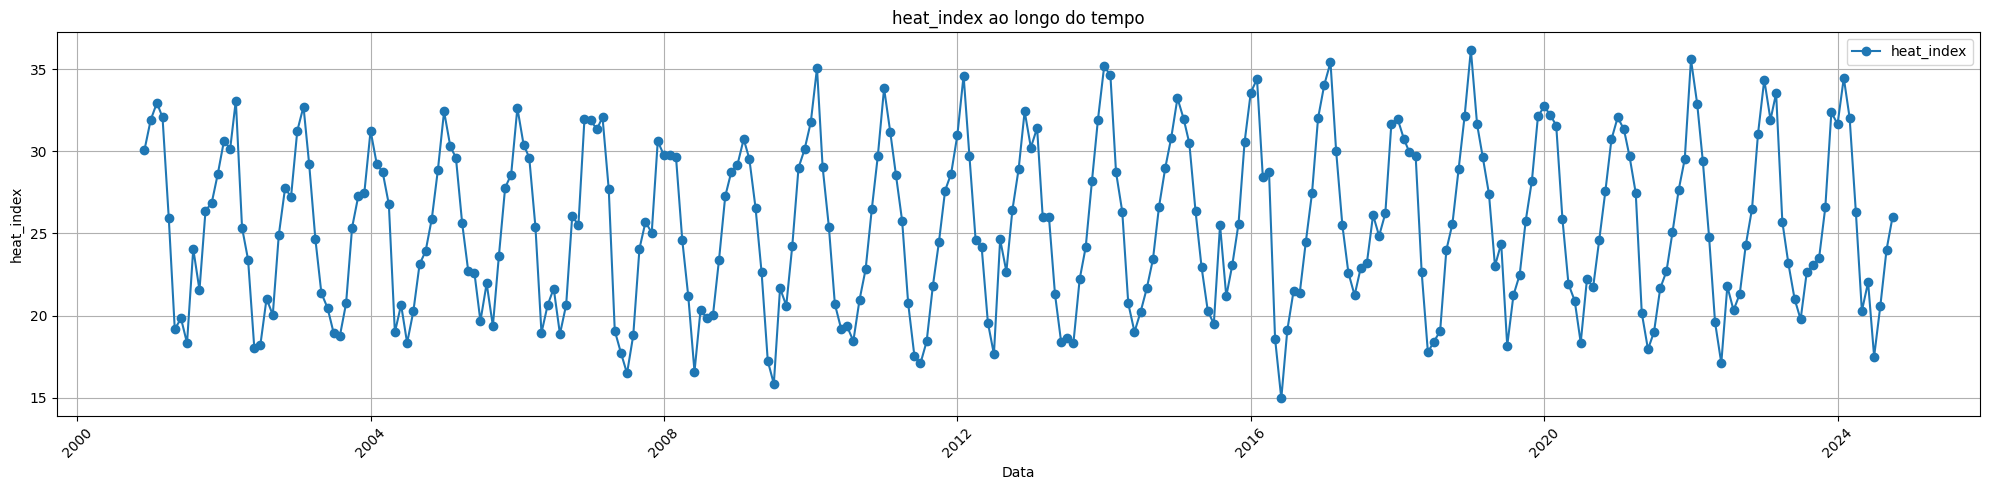

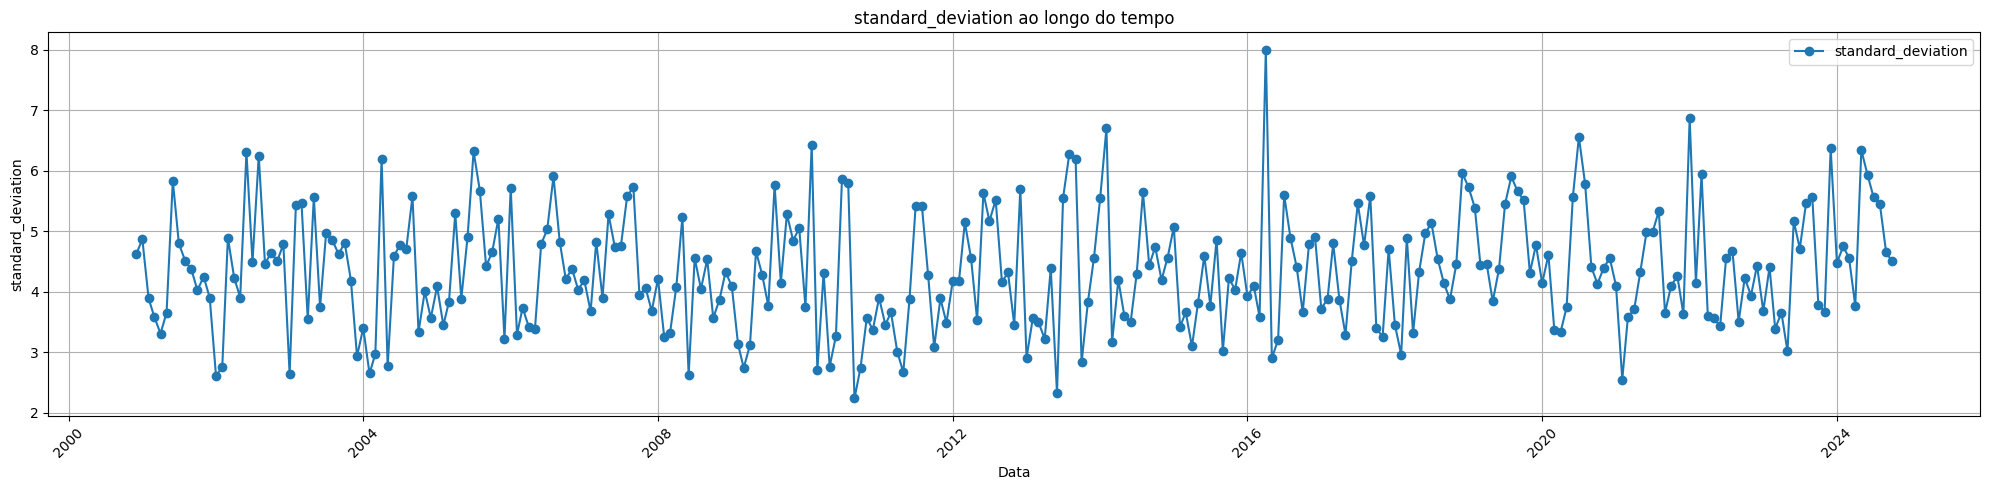

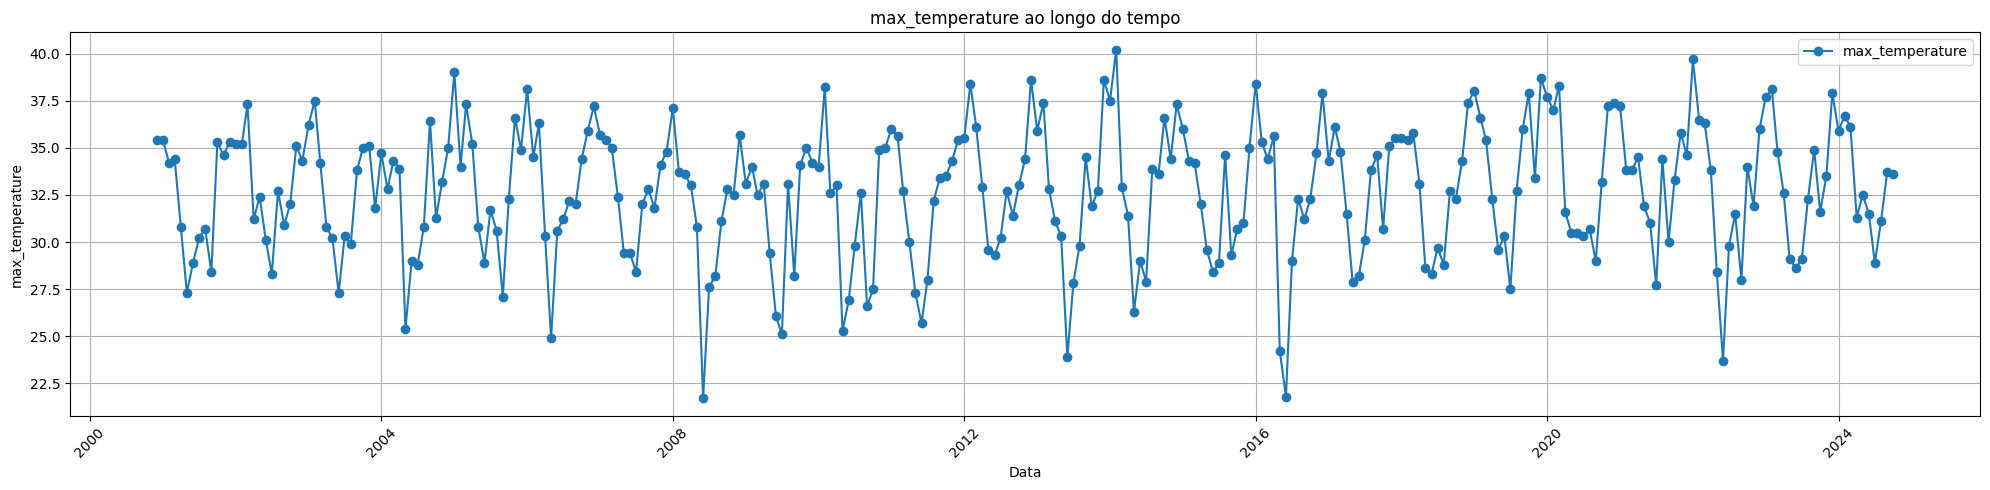

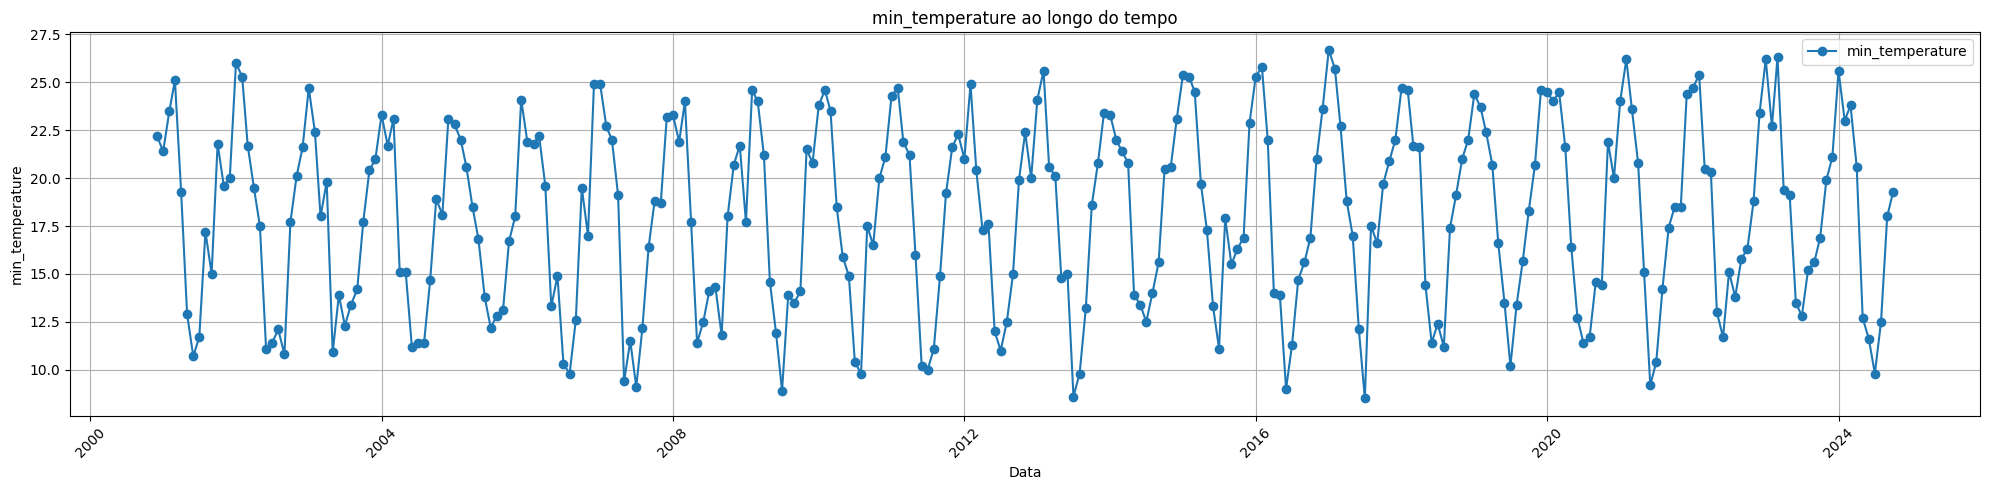

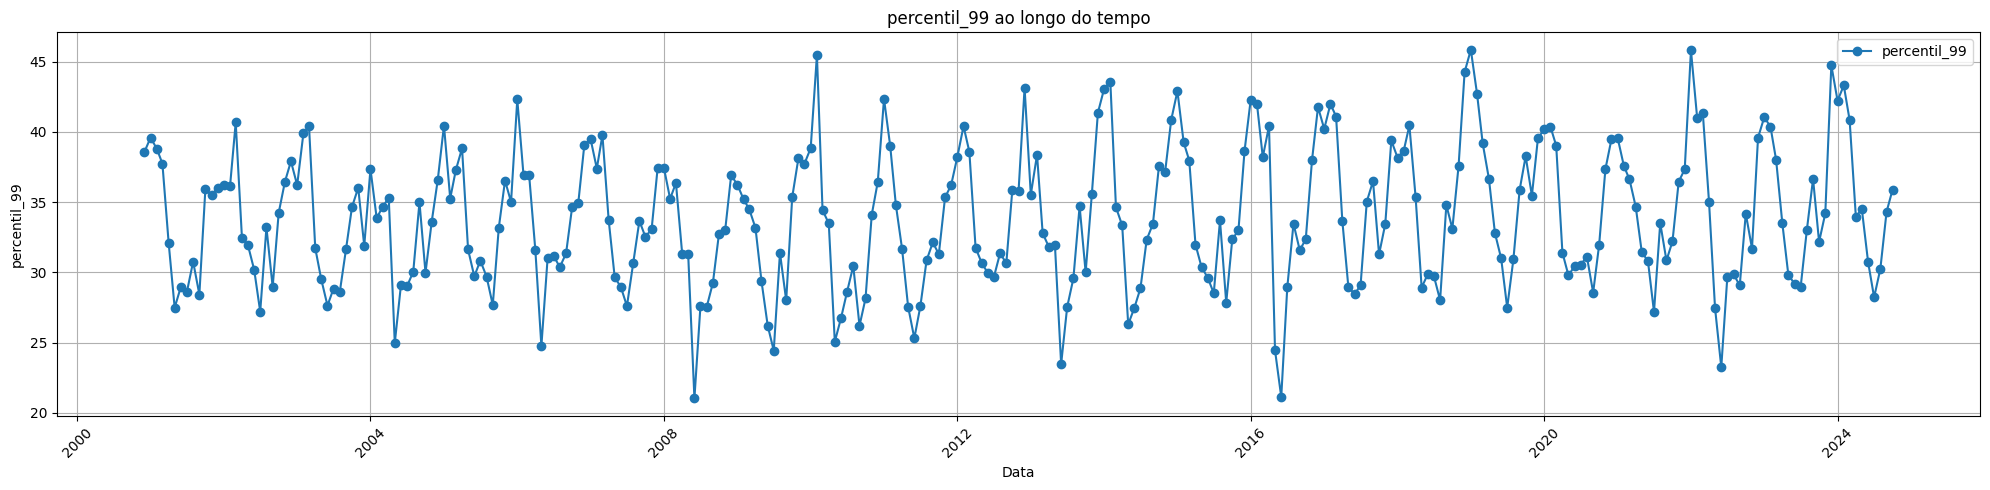

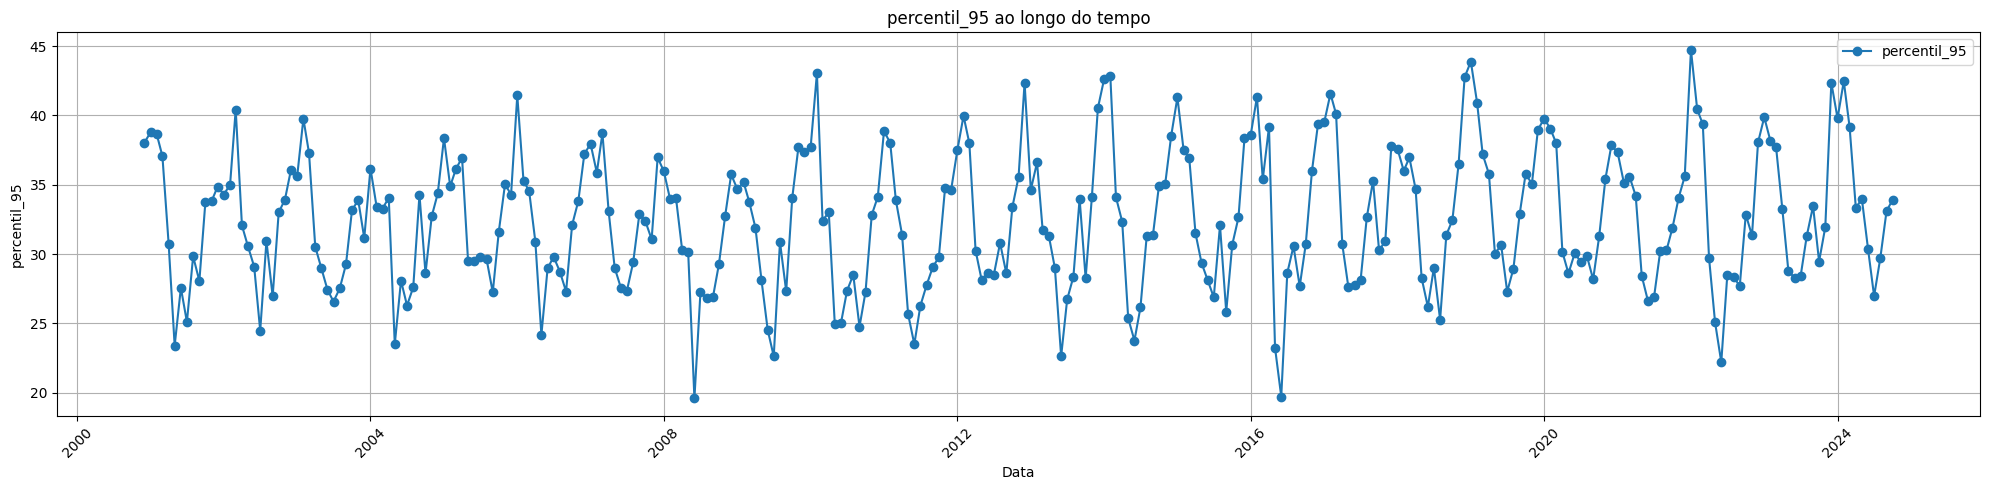

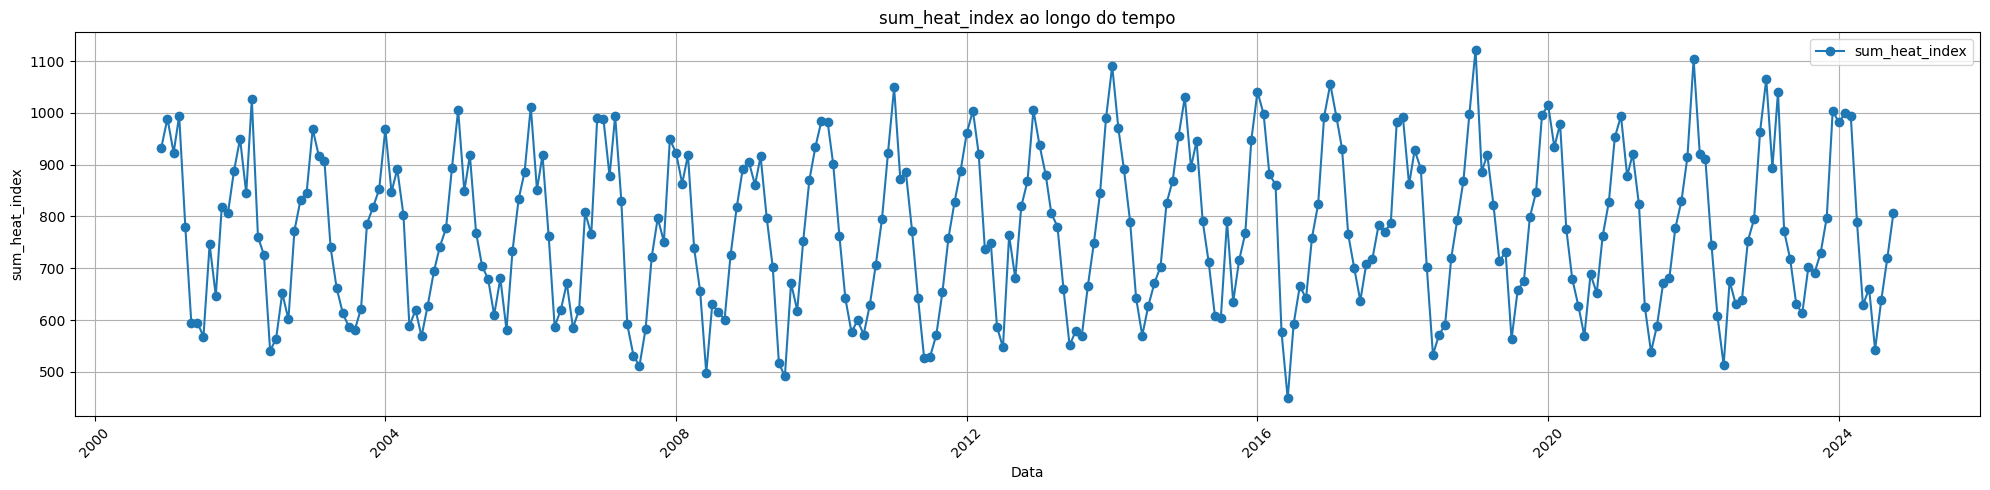

In [61]:
columns = ['heat_index',
            'standard_deviation',
            'max_temperature',
            'min_temperature',
            'percentil_99',
            'percentil_95',
            'sum_heat_index']

for variavel in columns:
    plt.figure(figsize=(20, 5))
    plt.plot(monthly_df['date'], monthly_df[variavel], marker='o', label=variavel)
    plt.title(f'{variavel} ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel(variavel)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Pré-processamento DATASUS

In [62]:
# csv_url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasus.csv'
# csv_url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/datasus_por_local_internacao_.csv'
csv_url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/datasus_por_local_intercacao_v2.csv'

datasus_df = pd.read_csv(csv_url, sep=';')

datasus_df

,Ano/mes processamento,Internacoes,Media_Permanencia,Obitos,Taxa_Mortalidade
0,..Janeiro/1998,3905,"6,3",229,"5,86"
1,..Fevereiro/1998,3502,"5,8",200,"5,71"
2,..Marco/1998,4322,"6,0",221,"5,11"
3,..Abril/1998,4132,"6,0",236,"5,71"
4,..Maio/1998,4434,"6,0",261,"5,89"
...,...,...,...,...,...
316,Maio/2024,3172,"6,7",313,"9,87"
317,Junho/2024,3640,"6,6",329,"9,04"
318,Julho/2024,3689,"6,5",338,"9,16"
319,Agosto/2024,3846,"6,8",389,"10,11"


In [63]:
datasus_df.rename(columns={
    'Ano/mes processamento': 'date',
    'Internacoes': 'hospitalizations',
    'Media_Permanencia': "average_stay",
    'Obitos': 'deaths',
    'Taxa_Mortalidade': 'mortality_rate'
    }, inplace=True)

datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate
0,..Janeiro/1998,3905,"6,3",229,"5,86"
1,..Fevereiro/1998,3502,"5,8",200,"5,71"
2,..Marco/1998,4322,"6,0",221,"5,11"
3,..Abril/1998,4132,"6,0",236,"5,71"
4,..Maio/1998,4434,"6,0",261,"5,89"
...,...,...,...,...,...
316,Maio/2024,3172,"6,7",313,"9,87"
317,Junho/2024,3640,"6,6",329,"9,04"
318,Julho/2024,3689,"6,5",338,"9,16"
319,Agosto/2024,3846,"6,8",389,"10,11"


## Ajustando a data

In [64]:
datasus_df['date'] = datasus_df['date'].str.lstrip('.')
datasus_df['date'] = datasus_df['date'].str.replace(' ', '').str.strip()

datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate
0,Janeiro/1998,3905,"6,3",229,"5,86"
1,Fevereiro/1998,3502,"5,8",200,"5,71"
2,Marco/1998,4322,"6,0",221,"5,11"
3,Abril/1998,4132,"6,0",236,"5,71"
4,Maio/1998,4434,"6,0",261,"5,89"
...,...,...,...,...,...
316,Maio/2024,3172,"6,7",313,"9,87"
317,Junho/2024,3640,"6,6",329,"9,04"
318,Julho/2024,3689,"6,5",338,"9,16"
319,Agosto/2024,3846,"6,8",389,"10,11"


In [65]:
datasus_df['date']

,date
0,Janeiro/1998
1,Fevereiro/1998
2,Marco/1998
3,Abril/1998
4,Maio/1998
...,...
316,Maio/2024
317,Junho/2024
318,Julho/2024
319,Agosto/2024


In [66]:
months = {
    'Janeiro': '01', 'Fevereiro': '02', 'Marco': '03', 'Abril': '04',
    'Maio': '05', 'Junho': '06', 'Julho': '07', 'Agosto': '08',
    'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}

datasus_df['date'] = datasus_df['date'].replace(months, regex=True)
datasus_df['date'] = datasus_df['date'].apply(lambda x: '-'.join(x.split('/')[::-1]))
datasus_df['date'] = pd.to_datetime(datasus_df['date'], format='%Y-%m')

datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate
0,1998-01-01,3905,"6,3",229,"5,86"
1,1998-02-01,3502,"5,8",200,"5,71"
2,1998-03-01,4322,"6,0",221,"5,11"
3,1998-04-01,4132,"6,0",236,"5,71"
4,1998-05-01,4434,"6,0",261,"5,89"
...,...,...,...,...,...
316,2024-05-01,3172,"6,7",313,"9,87"
317,2024-06-01,3640,"6,6",329,"9,04"
318,2024-07-01,3689,"6,5",338,"9,16"
319,2024-08-01,3846,"6,8",389,"10,11"


In [67]:
datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate
0,1998-01-01,3905,"6,3",229,"5,86"
1,1998-02-01,3502,"5,8",200,"5,71"
2,1998-03-01,4322,"6,0",221,"5,11"
3,1998-04-01,4132,"6,0",236,"5,71"
4,1998-05-01,4434,"6,0",261,"5,89"
...,...,...,...,...,...
316,2024-05-01,3172,"6,7",313,"9,87"
317,2024-06-01,3640,"6,6",329,"9,04"
318,2024-07-01,3689,"6,5",338,"9,16"
319,2024-08-01,3846,"6,8",389,"10,11"


## Verificando as datas

In [68]:
start_date = datasus_df["date"].min()
end_date = datasus_df["date"].max()
expected_dates = pd.date_range(start=start_date, end=end_date, freq="MS")

missing_dates = expected_dates.difference(datasus_df["date"])

if missing_dates.empty:
    print("Datas corretas")
else:
    print("Datas ausentes ou fora de ordem detectadas:")
    print(missing_dates)

Datas corretas


## Analise dos dados

In [69]:
datasus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              321 non-null    datetime64[ns]
 1   hospitalizations  321 non-null    int64         
 2   average_stay      321 non-null    object        
 3   deaths            321 non-null    int64         
 4   mortality_rate    321 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 12.7+ KB


In [70]:
datasus_df.describe()

,date,hospitalizations,deaths
count,321,321.000000,321.000000
mean,2011-05-02 03:57:45.420560640,3597.043614,291.931464
min,1998-01-01 00:00:00,2196.000000,141.000000
25%,2004-09-01 00:00:00,3285.000000,259.000000
50%,2011-05-01 00:00:00,3523.000000,286.000000
75%,2018-01-01 00:00:00,3959.000000,323.000000
max,2024-09-01 00:00:00,4768.000000,431.000000
std,NaN,448.462190,45.881386


### Convertendo para float cases e average_stay

In [71]:
datasus_df['average_stay'] = datasus_df['average_stay'].str.replace(',', '.').astype(float)
datasus_df['mortality_rate'] = datasus_df['mortality_rate'].str.replace(',', '.').astype(float)

datasus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              321 non-null    datetime64[ns]
 1   hospitalizations  321 non-null    int64         
 2   average_stay      321 non-null    float64       
 3   deaths            321 non-null    int64         
 4   mortality_rate    321 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 12.7 KB


In [72]:
datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate
0,1998-01-01,3905,6.3,229,5.86
1,1998-02-01,3502,5.8,200,5.71
2,1998-03-01,4322,6.0,221,5.11
3,1998-04-01,4132,6.0,236,5.71
4,1998-05-01,4434,6.0,261,5.89
...,...,...,...,...,...
316,2024-05-01,3172,6.7,313,9.87
317,2024-06-01,3640,6.6,329,9.04
318,2024-07-01,3689,6.5,338,9.16
319,2024-08-01,3846,6.8,389,10.11


## Missing data

In [73]:
datasus_df.isnull().sum()

,0
date,0
hospitalizations,0
average_stay,0
deaths,0
mortality_rate,0


## Valores inválidos

In [74]:
features = datasus_df.columns.tolist()
features.remove('date')

for feature in features:
    print(datasus_df[datasus_df[feature] < 0], "\n")

Empty DataFrame
Columns: [date, hospitalizations, average_stay, deaths, mortality_rate]
Index: [] 

Empty DataFrame
Columns: [date, hospitalizations, average_stay, deaths, mortality_rate]
Index: [] 

Empty DataFrame
Columns: [date, hospitalizations, average_stay, deaths, mortality_rate]
Index: [] 

Empty DataFrame
Columns: [date, hospitalizations, average_stay, deaths, mortality_rate]
Index: [] 



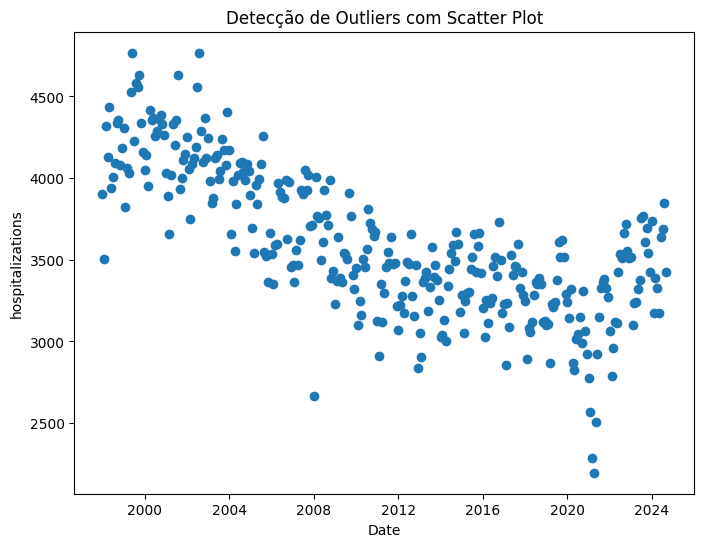

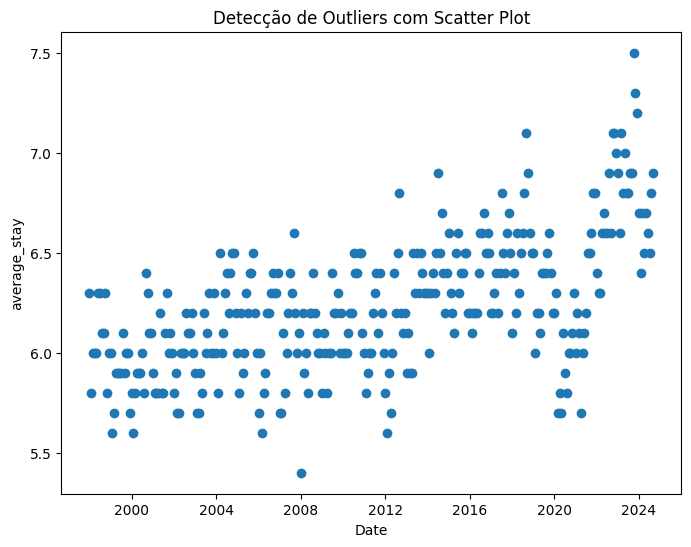

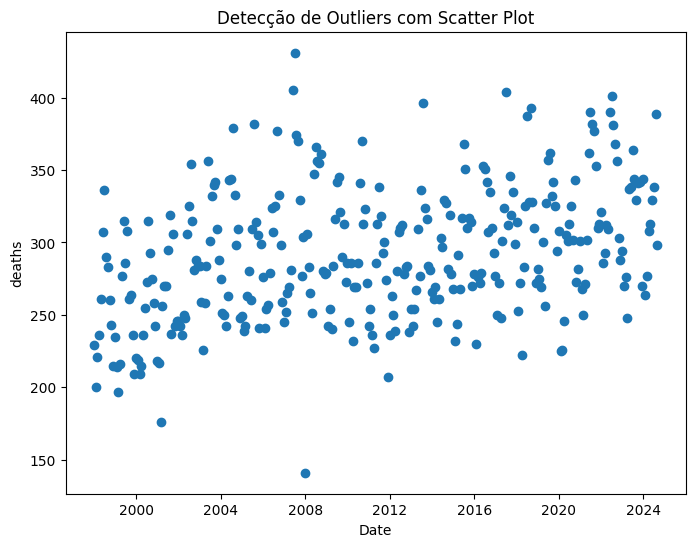

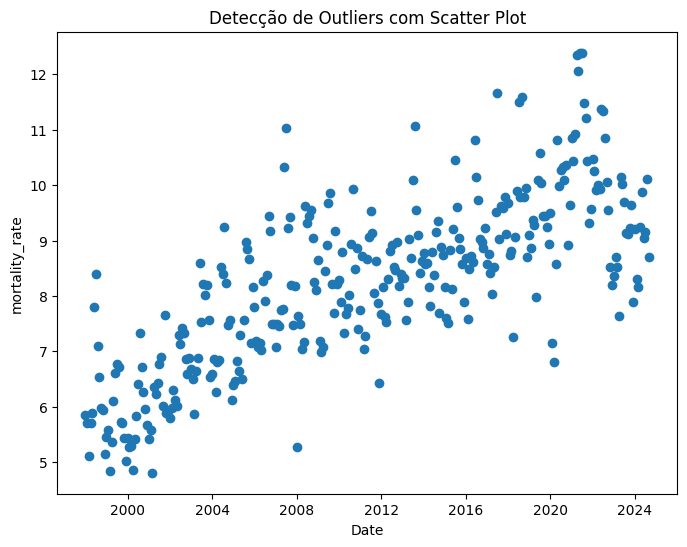

In [75]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(datasus_df['date'], datasus_df[feature])
    plt.title('Detecção de Outliers com Scatter Plot')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.show()


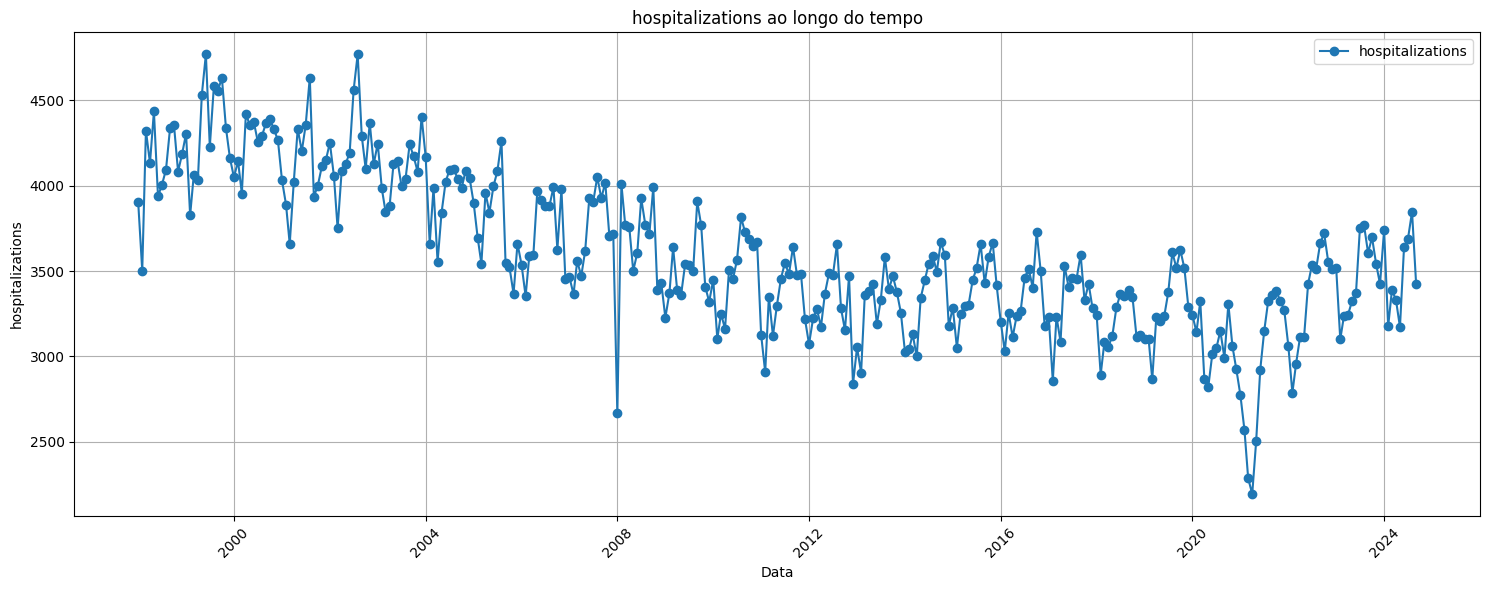

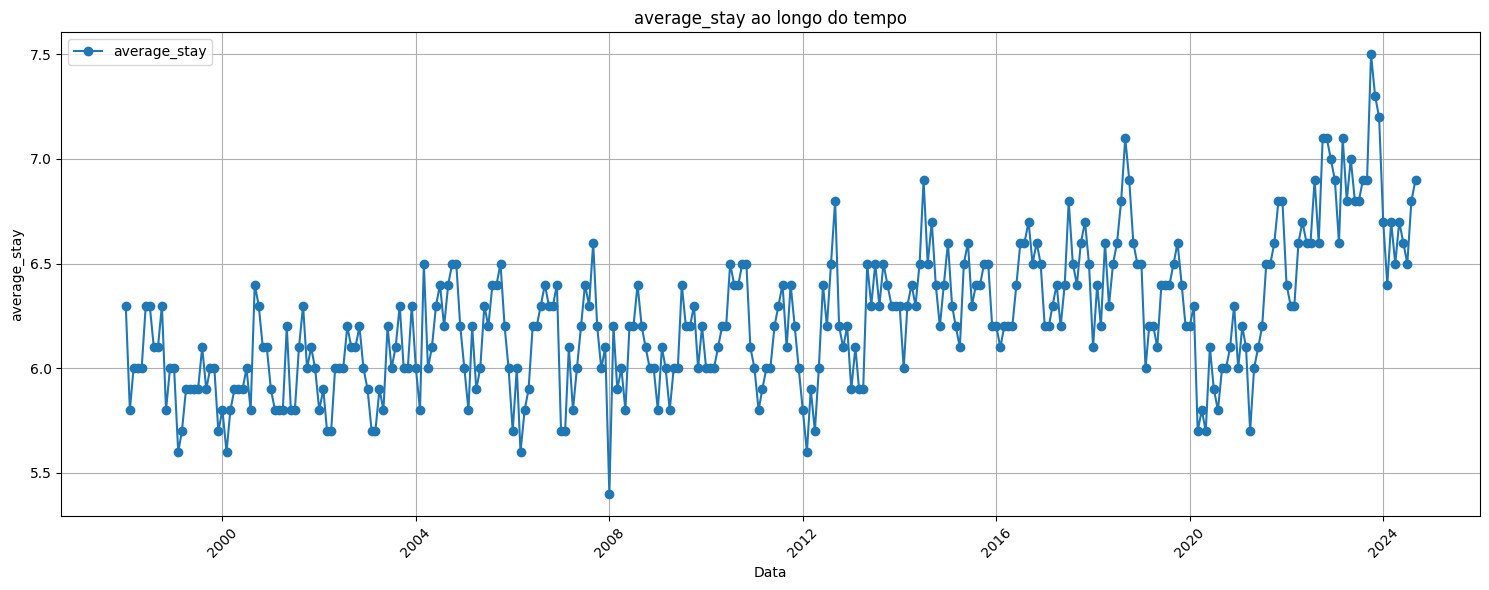

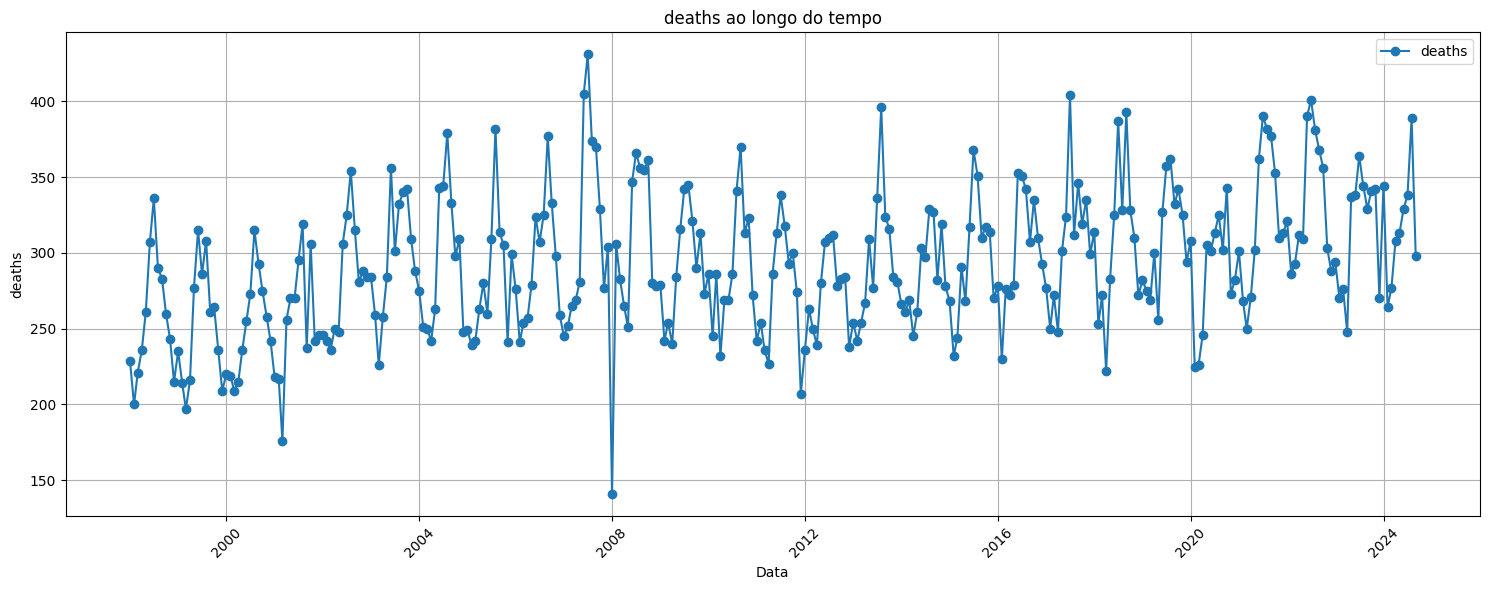

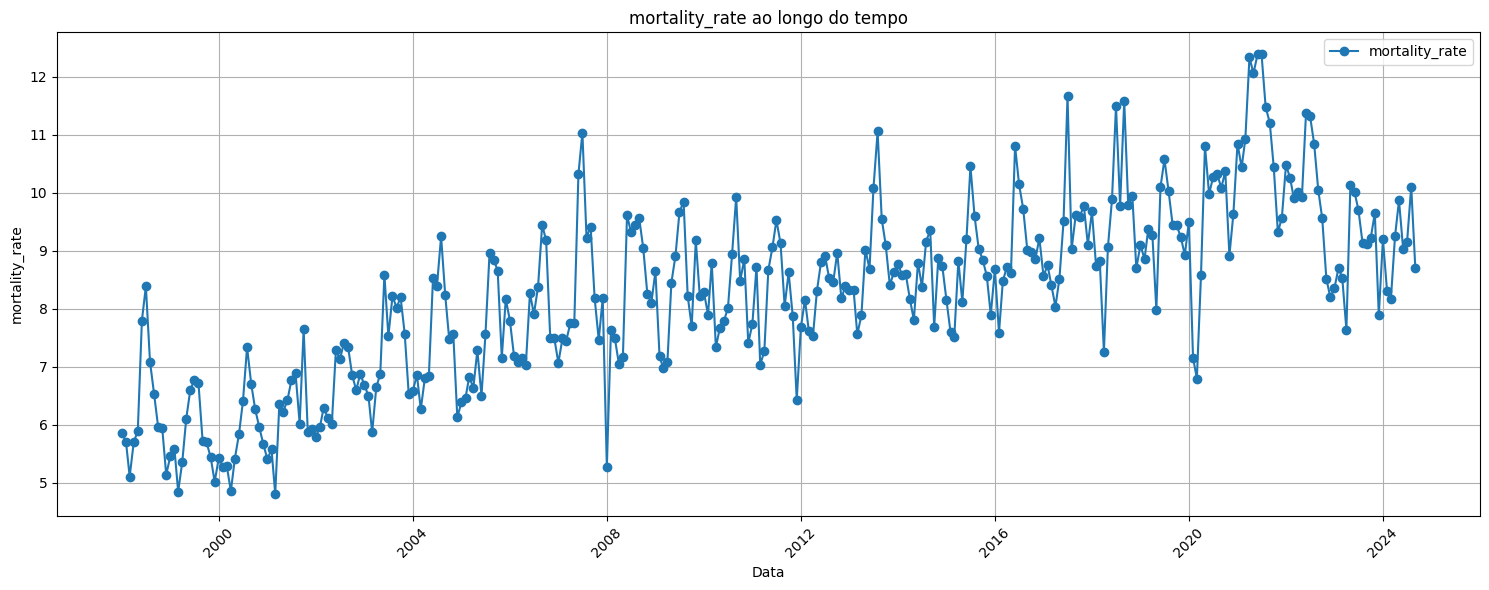

In [76]:
for feature in features:
    plt.figure(figsize=(15, 6))
    plt.plot(datasus_df['date'], datasus_df[feature], marker='o', label=feature)
    plt.title(f'{feature} ao longo do tempo')
    plt.xlabel('Data')
    plt.ylabel(feature)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Feature Engineering

In [77]:
datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate
0,1998-01-01,3905,6.3,229,5.86
1,1998-02-01,3502,5.8,200,5.71
2,1998-03-01,4322,6.0,221,5.11
3,1998-04-01,4132,6.0,236,5.71
4,1998-05-01,4434,6.0,261,5.89
...,...,...,...,...,...
316,2024-05-01,3172,6.7,313,9.87
317,2024-06-01,3640,6.6,329,9.04
318,2024-07-01,3689,6.5,338,9.16
319,2024-08-01,3846,6.8,389,10.11


### Média movel

In [78]:
datasus_df['hospitalizations_moving_avg_3'] = datasus_df['hospitalizations'].rolling(window=3).mean()
datasus_df['deaths_moving_avg_3']           = datasus_df['deaths'].rolling(window=3).mean()

datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate,hospitalizations_moving_avg_3,deaths_moving_avg_3
0,1998-01-01,3905,6.3,229,5.86,NaN,NaN
1,1998-02-01,3502,5.8,200,5.71,NaN,NaN
2,1998-03-01,4322,6.0,221,5.11,3909.666667,216.666667
3,1998-04-01,4132,6.0,236,5.71,3985.333333,219.000000
4,1998-05-01,4434,6.0,261,5.89,4296.000000,239.333333
...,...,...,...,...,...,...,...
316,2024-05-01,3172,6.7,313,9.87,3297.000000,299.333333
317,2024-06-01,3640,6.6,329,9.04,3380.333333,316.666667
318,2024-07-01,3689,6.5,338,9.16,3500.333333,326.666667
319,2024-08-01,3846,6.8,389,10.11,3725.000000,352.000000


### Lags

In [79]:
lags = [3, 6, 12]

for lag in lags:
    for feature in features:
        datasus_df[f'{feature}_lag_{lag}'] = datasus_df[feature].shift(lag)

datasus_df = datasus_df.dropna()

datasus_df

,date,hospitalizations,average_stay,deaths,mortality_rate,hospitalizations_moving_avg_3,deaths_moving_avg_3,hospitalizations_lag_3,average_stay_lag_3,deaths_lag_3,mortality_rate_lag_3,hospitalizations_lag_6,average_stay_lag_6,deaths_lag_6,mortality_rate_lag_6,hospitalizations_lag_12,average_stay_lag_12,deaths_lag_12,mortality_rate_lag_12
12,1999-01-01,4304,6.0,235,5.46,4189.333333,231.000000,4353.0,6.3,260.0,5.97,4004.0,6.3,336.0,8.39,3905.0,6.3,229.0,5.86
13,1999-02-01,3826,5.6,214,5.59,4104.000000,221.333333,4082.0,5.8,243.0,5.95,4093.0,6.1,290.0,7.09,3502.0,5.8,200.0,5.71
14,1999-03-01,4064,5.7,197,4.85,4064.666667,215.333333,4182.0,6.0,215.0,5.14,4336.0,6.1,283.0,6.53,4322.0,6.0,221.0,5.11
15,1999-04-01,4031,5.9,216,5.36,3973.666667,209.000000,4304.0,6.0,235.0,5.46,4353.0,6.3,260.0,5.97,4132.0,6.0,236.0,5.71
16,1999-05-01,4530,5.9,277,6.11,4208.333333,230.000000,3826.0,5.6,214.0,5.59,4082.0,5.8,243.0,5.95,4434.0,6.0,261.0,5.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2024-05-01,3172,6.7,313,9.87,3297.000000,299.333333,3176.0,6.4,264.0,8.31,3543.0,7.3,342.0,9.65,3322.0,7.0,337.0,10.14
317,2024-06-01,3640,6.6,329,9.04,3380.333333,316.666667,3390.0,6.7,277.0,8.17,3424.0,7.2,270.0,7.89,3374.0,6.8,338.0,10.02
318,2024-07-01,3689,6.5,338,9.16,3500.333333,326.666667,3329.0,6.5,308.0,9.25,3739.0,6.7,344.0,9.20,3754.0,6.8,364.0,9.70
319,2024-08-01,3846,6.8,389,10.11,3725.000000,352.000000,3172.0,6.7,313.0,9.87,3176.0,6.4,264.0,8.31,3768.0,6.9,344.0,9.13


In [80]:
datasus_df.columns

Index(['date', 'hospitalizations', 'average_stay', 'deaths', 'mortality_rate',
       'hospitalizations_moving_avg_3', 'deaths_moving_avg_3',
       'hospitalizations_lag_3', 'average_stay_lag_3', 'deaths_lag_3',
       'mortality_rate_lag_3', 'hospitalizations_lag_6', 'average_stay_lag_6',
       'deaths_lag_6', 'mortality_rate_lag_6', 'hospitalizations_lag_12',
       'average_stay_lag_12', 'deaths_lag_12', 'mortality_rate_lag_12'],
      dtype='object')

**Tranformando para int**

In [81]:
lags = [3, 6, 12]
integer_features = ['hospitalizations', 'deaths']

for lag in lags:
    for feature in integer_features:
        datasus_df[f'{feature}_lag_{lag}'] = datasus_df[f'{feature}_lag_{lag}'].astype(int)

datasus_df

<ipython-input-81-0bfab383a062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasus_df[f'{feature}_lag_{lag}'] = datasus_df[f'{feature}_lag_{lag}'].astype(int)
<ipython-input-81-0bfab383a062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasus_df[f'{feature}_lag_{lag}'] = datasus_df[f'{feature}_lag_{lag}'].astype(int)
<ipython-input-81-0bfab383a062>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,date,hospitalizations,average_stay,deaths,mortality_rate,hospitalizations_moving_avg_3,deaths_moving_avg_3,hospitalizations_lag_3,average_stay_lag_3,deaths_lag_3,mortality_rate_lag_3,hospitalizations_lag_6,average_stay_lag_6,deaths_lag_6,mortality_rate_lag_6,hospitalizations_lag_12,average_stay_lag_12,deaths_lag_12,mortality_rate_lag_12
12,1999-01-01,4304,6.0,235,5.46,4189.333333,231.000000,4353,6.3,260,5.97,4004,6.3,336,8.39,3905,6.3,229,5.86
13,1999-02-01,3826,5.6,214,5.59,4104.000000,221.333333,4082,5.8,243,5.95,4093,6.1,290,7.09,3502,5.8,200,5.71
14,1999-03-01,4064,5.7,197,4.85,4064.666667,215.333333,4182,6.0,215,5.14,4336,6.1,283,6.53,4322,6.0,221,5.11
15,1999-04-01,4031,5.9,216,5.36,3973.666667,209.000000,4304,6.0,235,5.46,4353,6.3,260,5.97,4132,6.0,236,5.71
16,1999-05-01,4530,5.9,277,6.11,4208.333333,230.000000,3826,5.6,214,5.59,4082,5.8,243,5.95,4434,6.0,261,5.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2024-05-01,3172,6.7,313,9.87,3297.000000,299.333333,3176,6.4,264,8.31,3543,7.3,342,9.65,3322,7.0,337,10.14
317,2024-06-01,3640,6.6,329,9.04,3380.333333,316.666667,3390,6.7,277,8.17,3424,7.2,270,7.89,3374,6.8,338,10.02
318,2024-07-01,3689,6.5,338,9.16,3500.333333,326.666667,3329,6.5,308,9.25,3739,6.7,344,9.20,3754,6.8,364,9.70
319,2024-08-01,3846,6.8,389,10.11,3725.000000,352.000000,3172,6.7,313,9.87,3176,6.4,264,8.31,3768,6.9,344,9.13


## Removendo features 'hospitalizations', 'average_stay', 'deaths', 'mortality_rate',

In [82]:
datasus_df = datasus_df.drop(['average_stay', 'deaths', 'mortality_rate'], axis=1)

datasus_df.columns

Index(['date', 'hospitalizations_moving_avg_3', 'deaths_moving_avg_3',
       'hospitalizations_lag_3', 'average_stay_lag_3', 'deaths_lag_3',
       'mortality_rate_lag_3', 'hospitalizations_lag_6', 'average_stay_lag_6',
       'deaths_lag_6', 'mortality_rate_lag_6', 'hospitalizations_lag_12',
       'average_stay_lag_12', 'deaths_lag_12', 'mortality_rate_lag_12'],
      dtype='object')

## Dados após 2000

In [83]:
datasus_df = datasus_df[datasus_df['date'] >= '2000-12-1']

## Unir com INMET

In [84]:
datasus_df['date'] = datasus_df['date'].dt.to_period('M')
# datasus_df = datasus_df[11:]

datasus_df.reset_index(drop=True, inplace=True)
datasus_df

,date,hospitalizations_moving_avg_3,deaths_moving_avg_3,hospitalizations_lag_3,average_stay_lag_3,deaths_lag_3,mortality_rate_lag_3,hospitalizations_lag_6,average_stay_lag_6,deaths_lag_6,mortality_rate_lag_6,hospitalizations_lag_12,average_stay_lag_12,deaths_lag_12,mortality_rate_lag_12
0,2000-12,4327.666667,258.333333,4365,6.4,293,6.71,4370,5.9,255,5.84,4163,5.7,209,5.02
1,2001-01,4209.000000,239.333333,4388,6.3,275,6.27,4256,6.0,273,6.41,4048,5.8,220,5.43
2,2001-02,4062.000000,225.666667,4329,6.1,258,5.96,4290,5.8,315,7.34,4144,5.6,219,5.28
3,2001-03,3859.333333,203.666667,4266,6.1,242,5.67,4365,6.4,293,6.71,3953,5.8,209,5.29
4,2001-04,3856.000000,216.333333,4032,5.9,218,5.41,4388,6.3,275,6.27,4420,5.9,215,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2024-05,3297.000000,299.333333,3176,6.4,264,8.31,3543,7.3,342,9.65,3322,7.0,337,10.14
282,2024-06,3380.333333,316.666667,3390,6.7,277,8.17,3424,7.2,270,7.89,3374,6.8,338,10.02
283,2024-07,3500.333333,326.666667,3329,6.5,308,9.25,3739,6.7,344,9.20,3754,6.8,364,9.70
284,2024-08,3725.000000,352.000000,3172,6.7,313,9.87,3176,6.4,264,8.31,3768,6.9,344,9.13


Pegando o csv

In [85]:
# csv_url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/monthly_df_INMET.csv'
csv_url = '/content/monthly_df.csv'

monthly_df_inmet = pd.read_csv(csv_url)

monthly_df_inmet.head(5)

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99,lag_heat_index_1,lag_heat_index_2,lag_heat_index_3
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,38.5520,26.305667,23.427742,21.801111
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,39.5900,30.079677,26.305667,23.427742
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,38.8030,31.907742,30.079677,26.305667
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,37.7400,32.959643,31.907742,30.079677
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,32.1117,32.071290,32.959643,31.907742


In [86]:
monthly_df_inmet.shape

(287, 14)

In [87]:
datasus_df.shape

(286, 15)

In [88]:
monthly_inmet_datasus = pd.concat([monthly_df_inmet, datasus_df], axis=1)

monthly_inmet_datasus

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,...,deaths_lag_3,mortality_rate_lag_3,hospitalizations_lag_6,average_stay_lag_6,deaths_lag_6,mortality_rate_lag_6,hospitalizations_lag_12,average_stay_lag_12,deaths_lag_12,mortality_rate_lag_12
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,...,293.0,6.71,4370.0,5.9,255.0,5.84,4163.0,5.7,209.0,5.02
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,...,275.0,6.27,4256.0,6.0,273.0,6.41,4048.0,5.8,220.0,5.43
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,...,258.0,5.96,4290.0,5.8,315.0,7.34,4144.0,5.6,219.0,5.28
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,...,242.0,5.67,4365.0,6.4,293.0,6.71,3953.0,5.8,209.0,5.29
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,...,218.0,5.41,4388.0,6.3,275.0,6.27,4420.0,5.9,215.0,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6,660.86,30.344,...,277.0,8.17,3424.0,7.2,270.0,7.89,3374.0,6.8,338.0,10.02
283,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8,542.61,26.970,...,308.0,9.25,3739.0,6.7,344.0,9.20,3754.0,6.8,364.0,9.70
284,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5,638.29,29.725,...,313.0,9.87,3176.0,6.4,264.0,8.31,3768.0,6.9,344.0,9.13
285,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0,720.63,33.113,...,329.0,9.04,3390.0,6.7,277.0,8.17,3606.0,6.9,329.0,9.12


**removendo duas últimas linhas**

In [89]:
monthly_inmet_datasus = monthly_inmet_datasus.drop(monthly_inmet_datasus.tail(1).index)

monthly_inmet_datasus.tail(5)

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,...,deaths_lag_3,mortality_rate_lag_3,hospitalizations_lag_6,average_stay_lag_6,deaths_lag_6,mortality_rate_lag_6,hospitalizations_lag_12,average_stay_lag_12,deaths_lag_12,mortality_rate_lag_12
281,2024-05,20.278710,6.342679,20.00,76.16,1.62,32.5,12.7,628.64,33.985,...,264.0,8.31,3543.0,7.3,342.0,9.65,3322.0,7.0,337.0,10.14
282,2024-06,22.028667,5.929766,21.99,64.67,1.66,31.5,11.6,660.86,30.344,...,277.0,8.17,3424.0,7.2,270.0,7.89,3374.0,6.8,338.0,10.02
283,2024-07,17.503548,5.561158,17.91,67.87,1.31,28.9,9.8,542.61,26.970,...,308.0,9.25,3739.0,6.7,344.0,9.20,3754.0,6.8,364.0,9.70
284,2024-08,20.590000,5.447565,20.85,60.29,1.61,31.1,12.5,638.29,29.725,...,313.0,9.87,3176.0,6.4,264.0,8.31,3768.0,6.9,344.0,9.13
285,2024-09,24.021000,4.649160,23.80,63.00,1.42,33.7,18.0,720.63,33.113,...,329.0,9.04,3390.0,6.7,277.0,8.17,3606.0,6.9,329.0,9.12


**Salvando como csv**

In [90]:
monthly_inmet_datasus.to_csv('monthly_inmet_datasus.csv', index=False)

# Pré-processamento dados geográficos MapBiomas

In [ ]:
url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/dados_geograficos.csv'

map_biomas_df = pd.read_csv(url)

map_biomas_df

,date,deforestation,primary_forest_loss,favela,urbanized_area
0,2000-12,6164.578305,150,1865.773354,14831.872329
1,2001-01,6390.131585,201,1903.810075,14972.162742
2,2001-02,6390.131585,201,1903.810075,14972.162742
3,2001-03,6390.131585,201,1903.810075,14972.162742
4,2001-04,6390.131585,201,1903.810075,14972.162742
...,...,...,...,...,...
272,2023-08,8843.702904,12,2133.371088,16874.949657
273,2023-09,8843.702904,12,2133.371088,16874.949657
274,2023-10,8843.702904,12,2133.371088,16874.949657
275,2023-11,8843.702904,12,2133.371088,16874.949657


### converter colunas para inteiros

In [ ]:
columns = ['deforestation', 'favela', 'urbanized_area']

for feature in columns:
    map_biomas_df[feature] = map_biomas_df[feature].astype(int)

map_biomas_df

,date,deforestation,primary_forest_loss,favela,urbanized_area
0,2000-12,6164,150,1865,14831
1,2001-01,6390,201,1903,14972
2,2001-02,6390,201,1903,14972
3,2001-03,6390,201,1903,14972
4,2001-04,6390,201,1903,14972
...,...,...,...,...,...
272,2023-08,8843,12,2133,16874
273,2023-09,8843,12,2133,16874
274,2023-10,8843,12,2133,16874
275,2023-11,8843,12,2133,16874


In [ ]:
map_biomas_df.describe()

,deforestation,primary_forest_loss,favela,urbanized_area
count,277.000000,277.000000,277.000000,277.000000
mean,8069.140794,94.895307,2052.018051,16158.104693
std,695.720343,111.093543,62.672397,592.951674
min,6164.000000,12.000000,1865.000000,14831.000000
25%,7605.000000,34.000000,2022.000000,15608.000000
50%,8291.000000,74.000000,2065.000000,16380.000000
75%,8637.000000,101.000000,2102.000000,16694.000000
max,8843.000000,576.000000,2133.000000,16874.000000


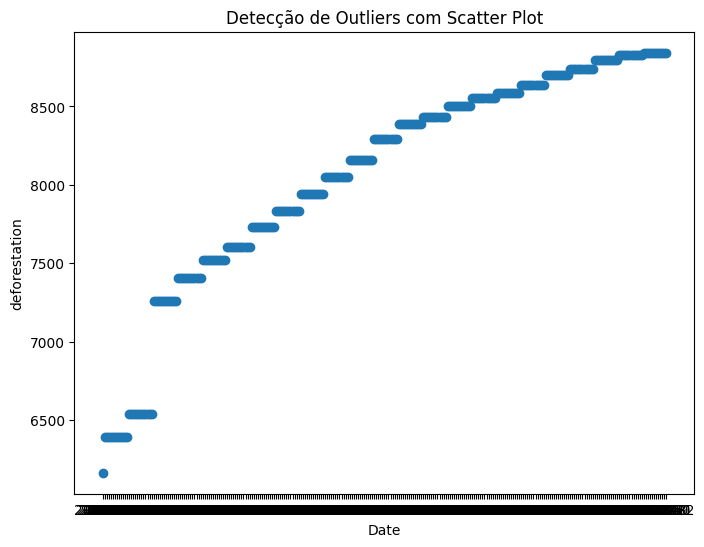

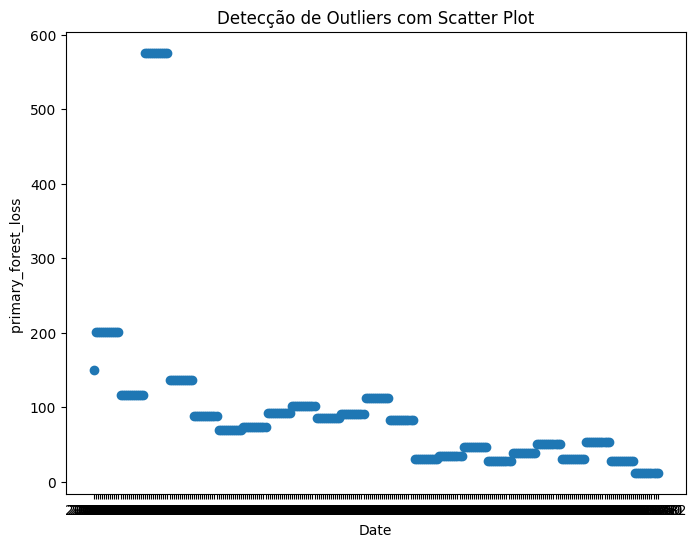

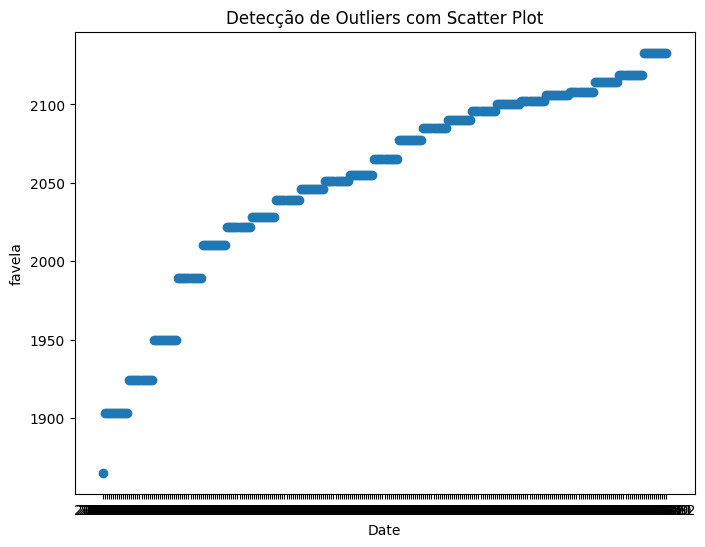

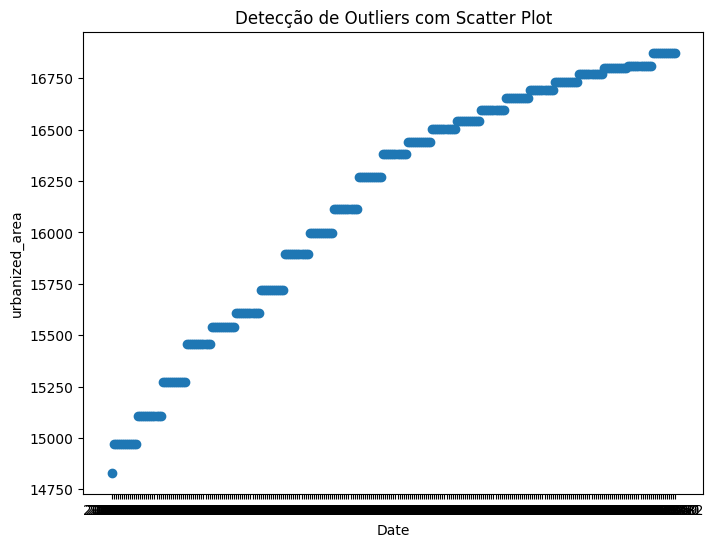

In [ ]:
features = map_biomas_df.columns.tolist()
features.remove('date')

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(map_biomas_df['date'], map_biomas_df[feature])
    plt.title('Detecção de Outliers com Scatter Plot')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.show()


## Unir com o dataset

Usando o csv

In [ ]:
# csv_url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/monthly_inmet_datasus.csv'
csv_url = '/content/monthly_inmet_datasus.csv'

monthly_inmet_datasus_df = pd.read_csv(csv_url)

monthly_inmet_datasus_df.head(5)

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99,lag_heat_index_1,lag_heat_index_2,lag_heat_index_3,hospitalizations,average_stay,deaths,mortality_rate
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,38.5520,26.305667,23.427742,21.801111,4266,6.1,242,5.67
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,39.5900,30.079677,26.305667,23.427742,4032,5.9,218,5.41
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,38.8030,31.907742,30.079677,26.305667,3888,5.8,217,5.58
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,37.7400,32.959643,31.907742,30.079677,3658,5.8,176,4.81
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,32.1117,32.071290,32.959643,31.907742,4022,5.8,256,6.36


### Removendo dados de 2024

In [ ]:
monthly_inmet_datasus_df = monthly_inmet_datasus_df[:len(map_biomas_df)]
monthly_inmet_datasus_df

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,percentil_99,lag_heat_index_1,lag_heat_index_2,lag_heat_index_3,hospitalizations,average_stay,deaths,mortality_rate
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,38.5520,26.305667,23.427742,21.801111,4266,6.1,242,5.67
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,39.5900,30.079677,26.305667,23.427742,4032,5.9,218,5.41
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,38.8030,31.907742,30.079677,26.305667,3888,5.8,217,5.58
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,37.7400,32.959643,31.907742,30.079677,3658,5.8,176,4.81
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,32.1117,32.071290,32.959643,31.907742,4022,5.8,256,6.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-08,22.680968,5.464467,22.86,52.13,1.62,32.3,15.2,703.11,31.335,33.0020,19.769677,21.014000,23.174194,3768,6.9,344,9.13
273,2023-09,23.058000,5.559752,22.70,69.97,1.69,34.9,15.6,691.74,33.460,36.6514,22.680968,19.769677,21.014000,3606,6.9,329,9.12
274,2023-10,23.510645,3.787990,23.30,63.58,1.84,31.6,16.9,728.83,29.465,32.1660,23.058000,22.680968,19.769677,3697,7.5,341,9.22
275,2023-11,26.595000,3.669000,25.96,61.17,1.65,33.5,19.9,797.85,31.954,34.2029,23.510645,23.058000,22.680968,3543,7.3,342,9.65


### Unindo os datasets

In [ ]:
for feature in features:
    monthly_inmet_datasus_df[f'{feature}'] = map_biomas_df[feature]

monthly_inmet_datasus_df

<ipython-input-87-d21e730650dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_inmet_datasus_df[f'{feature}'] = map_biomas_df[feature]
<ipython-input-87-d21e730650dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_inmet_datasus_df[f'{feature}'] = map_biomas_df[feature]
<ipython-input-87-d21e730650dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,...,lag_heat_index_2,lag_heat_index_3,hospitalizations,average_stay,deaths,mortality_rate,deforestation,primary_forest_loss,favela,urbanized_area
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,...,23.427742,21.801111,4266,6.1,242,5.67,6164,150,1865,14831
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,...,26.305667,23.427742,4032,5.9,218,5.41,6390,201,1903,14972
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,...,30.079677,26.305667,3888,5.8,217,5.58,6390,201,1903,14972
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,...,31.907742,30.079677,3658,5.8,176,4.81,6390,201,1903,14972
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,...,32.959643,31.907742,4022,5.8,256,6.36,6390,201,1903,14972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-08,22.680968,5.464467,22.86,52.13,1.62,32.3,15.2,703.11,31.335,...,21.014000,23.174194,3768,6.9,344,9.13,8843,12,2133,16874
273,2023-09,23.058000,5.559752,22.70,69.97,1.69,34.9,15.6,691.74,33.460,...,19.769677,21.014000,3606,6.9,329,9.12,8843,12,2133,16874
274,2023-10,23.510645,3.787990,23.30,63.58,1.84,31.6,16.9,728.83,29.465,...,22.680968,19.769677,3697,7.5,341,9.22,8843,12,2133,16874
275,2023-11,26.595000,3.669000,25.96,61.17,1.65,33.5,19.9,797.85,31.954,...,23.058000,22.680968,3543,7.3,342,9.65,8843,12,2133,16874


### Salvando csv

In [ ]:
monthly_inmet_datasus_df.to_csv('dataset_with_geographic_data.csv', index=False)

In [ ]:
monthly_inmet_datasus_df

,date,heat_index,standard_deviation,mean_temperature,mean_humidity,mean_wind_speed,max_temperature,min_temperature,sum_heat_index,percentil_95,...,lag_heat_index_2,lag_heat_index_3,hospitalizations,average_stay,deaths,mortality_rate,deforestation,primary_forest_loss,favela,urbanized_area
0,2000-12,30.079677,4.615565,28.94,51.32,2.00,35.4,22.2,932.47,38.025,...,23.427742,21.801111,4266,6.1,242,5.67,6164,150,1865,14831
1,2001-01,31.907742,4.864888,29.69,59.10,2.19,35.4,21.4,989.14,38.780,...,26.305667,23.427742,4032,5.9,218,5.41,6390,201,1903,14972
2,2001-02,32.959643,3.889432,30.08,60.14,2.33,34.2,23.5,922.87,38.625,...,30.079677,26.305667,3888,5.8,217,5.58,6390,201,1903,14972
3,2001-03,32.071290,3.585808,29.82,56.61,2.21,34.4,25.1,994.21,37.065,...,31.907742,30.079677,3658,5.8,176,4.81,6390,201,1903,14972
4,2001-04,25.963667,3.307106,25.37,64.77,1.68,30.8,19.3,778.91,30.751,...,32.959643,31.907742,4022,5.8,256,6.36,6390,201,1903,14972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-08,22.680968,5.464467,22.86,52.13,1.62,32.3,15.2,703.11,31.335,...,21.014000,23.174194,3768,6.9,344,9.13,8843,12,2133,16874
273,2023-09,23.058000,5.559752,22.70,69.97,1.69,34.9,15.6,691.74,33.460,...,19.769677,21.014000,3606,6.9,329,9.12,8843,12,2133,16874
274,2023-10,23.510645,3.787990,23.30,63.58,1.84,31.6,16.9,728.83,29.465,...,22.680968,19.769677,3697,7.5,341,9.22,8843,12,2133,16874
275,2023-11,26.595000,3.669000,25.96,61.17,1.65,33.5,19.9,797.85,31.954,...,23.058000,22.680968,3543,7.3,342,9.65,8843,12,2133,16874
